#### Script Comments
##### File associated with 'FullfilementPlanAU'
Author: Ruben A. Proano (rpmeie@rit.edu)

This code should be used using the output stored in file **aa**, which is output of the simulation study from code "FullfilementPlanAU". Scripts in this file generate the data, tables, and figures used in the associated paper

This code is licensed under a **Creative Commons Attribution 4.0 International License** https://creativecommons.org/licenses/by/4.0/

Attribution the data and code should include:

    Ruben A. Proano, Rochester Institute of Technology, rpmeie@rit.edu
    Copyright notice (© 2025 R.Proano)
    Add a link to the original work (paper link)
--- 

**aa** : object that collects simulation output

#### Column headings of **aa**
- vac: vaccine
- g_rep: tuple for (g-value, replication)
- v2/v1: ratio between the profit-per-dose of a vaccine made and sold in AU Gavi countries and the profit-per-dose of the same vaccine if made and sold in non-AU Gavi countries. 
- v3/v1: ratio between the profit-per-dose of a vaccine made in non-AU Gavi countries and sold in AU Gavi countries and the the profit-per-dose of the same vaccine if made and sold in non-AU Gavi countries. 
- K1: non-AU vaccine production capacity
- K2: AU vaccine production capacity
- scenario: Profit scenario based on the relationship of the profit per dose for procurement scenarios (v1, v2, v3)
- area: profit scenario area based on the simulated vaccine profits and capacities
- xD: optimal profit-driven fulfillement for vaccines made and sold in non-AU countries (procurement interaction NN)
- xO: optimal profit-driven fulfillement for vaccines made and sold in AU countries (procurement interaction AA)
- xT: optimal profit-driven fulfillement for vaccines made in non-AU countries and sold in AU (procurement interaction NA)
- pfD:profit for procurement interaction NN (when there is AU production)
- pfO: profit for procurement interaction AA (when there is AU producton)
- pfT: profit for procurement interaction NA (when there is AU production)
- bpfD: benchmark profit for procurement interaction NN (when there is no AU production)
- bpfO: benchmark profit for procurement interaction AA (when there is no AU production)
- bpfT: benchmark profit for procurement interaction NA (when there is no AU production)
- pDtot: pfD + pfT
- bpfDtot: bpfD + bpfT
- g: proportion of the African vaccine demand that aims to be supplied with domestic production
- rep: replication

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt  
import seaborn as sns
import zipfile

df = pd.read_csv('aa.zip',compression='zip')

### Displaying column headers of file **aa**, simulation output

In [2]:
df.columns


Index(['vac', 'g_rep', 'v2/v1', 'v3/v1', 'K1', 'K2', 'scenario', 'area', 'xD',
       'xO', 'xT', 'pfD', 'pfO', 'pfT', 'bpfD', 'bpfO', 'bpfT', 'pDtot',
       'bpfDtot', 'g', 'rep'],
      dtype='object')

In [3]:
df.head()

vac     g_rep     v2/v1     v3/v1         K1   K2  scenario area  \
0  HPV  (0.0, 0)  0.999930  0.999754  5806000.0  0.0         1  a_2   
1  HPV  (0.0, 1)  1.000145  1.000022  5806000.0  0.0         4  a_2   
2  HPV  (0.0, 2)  1.000260  1.000095  5806000.0  0.0         4  a_2   
3  HPV  (0.0, 3)  1.000311  1.000297  5806000.0  0.0         4  a_2   
4  HPV  (0.0, 4)  0.999498  1.000000  5806000.0  0.0         2  a_3   

             xD   xO  ...           pfD  pfO           pfT          bpfD  \
0  5.369883e+06  0.0  ...  2.416259e+07  0.0  1.961893e+06  2.416259e+07   
1  2.186277e+06  0.0  ...  9.836665e+06  0.0  1.628649e+07  9.836665e+06   
2  2.860001e+06  0.0  ...  1.286935e+07  0.0  1.325759e+07  1.286935e+07   
3  4.685840e+05  0.0  ...  2.108024e+06  0.0  2.401862e+07  2.108024e+06   
4  5.806000e+06  0.0  ...  2.613030e+07  0.0  0.000000e+00  2.613030e+07   

   bpfO          bpfT         pDtot       bpfDtot    g  rep  
0   0.0  1.961893e+06  2.612448e+07  2.612448e+07  0.0  0.0  
1   0.0  1.628649e+07  2.612315e+07  2.612315e+07  0.0  1.0  
2   0.0  1.325759e+07  2.612694e+07  2.612694e+07  0.0  2.0  
3   0.0  2.401862e+07  2.612665e+07  2.612665e+07  0.0  3.0  
4   0.0  0.000000e+00  2.613030e+07  2.613030e+07  0.0  4.0  

[5 rows x 21 columns]

In [4]:
df.groupby(['vac','g','scenario']).mean(numeric_only=True)

v2/v1     v3/v1         K1          K2            xD  \
vac g   scenario                                                            
HPV 0.0 1         0.999814  0.999637  5806000.0         0.0  4.426150e+06   
        2         0.999624  0.999812  5806000.0         0.0  4.393784e+06   
        3         1.000187  0.999814  5806000.0         0.0  4.424975e+06   
        4         1.000365  1.000184  5806000.0         0.0  1.659022e+06   
        5         0.999998  1.000279  5806000.0         0.0  1.650707e+06   
...                    ...       ...        ...         ...           ...   
YF  1.0 1         0.924463  0.847859        0.0  55350000.0  0.000000e+00   
        2         0.847709  0.923356        0.0  55350000.0  0.000000e+00   
        3         1.087568  0.919508        0.0  55350000.0  0.000000e+00   
        4         1.183502  1.090942        0.0  55350000.0  0.000000e+00   
        5         1.006906  1.136781        0.0  55350000.0  0.000000e+00   

                            xO            xT           pfD           pfO  \
vac g   scenario                                                           
HPV 0.0 1         0.000000e+00  1.284492e+06  1.992133e+07  0.000000e+00   
        2         0.000000e+00  1.300220e+06  1.977575e+07  0.000000e+00   
        3         0.000000e+00  1.284789e+06  1.991241e+07  0.000000e+00   
        4         0.000000e+00  4.029475e+06  7.464224e+06  0.000000e+00   
        5         0.000000e+00  4.039545e+06  7.427517e+06  0.000000e+00   
...                        ...           ...           ...           ...   
YF  1.0 1         5.293797e+07  0.000000e+00  0.000000e+00  4.319901e+07   
        2         5.291142e+07  0.000000e+00  0.000000e+00  3.966061e+07   
        3         5.309469e+07  0.000000e+00  0.000000e+00  4.694909e+07   
        4         5.291353e+07  0.000000e+00  0.000000e+00  4.674801e+07   
        5         5.300670e+07  0.000000e+00  0.000000e+00  4.144882e+07   

                           pfT          bpfD  bpfO          bpfT  \
vac g   scenario                                                   
HPV 0.0 1         5.779173e+06  1.992133e+07   0.0  5.779173e+06   
        2         5.850979e+06  1.977575e+07   0.0  5.850979e+06   
        3         5.780498e+06  1.991241e+07   0.0  5.780498e+06   
        4         1.813261e+07  7.464224e+06   0.0  1.813261e+07   
        5         1.818137e+07  7.427517e+06   0.0  1.818137e+07   
...                        ...           ...   ...           ...   
YF  1.0 1         0.000000e+00  0.000000e+00   0.0  3.957574e+07   
        2         0.000000e+00  0.000000e+00   0.0  4.325378e+07   
        3         0.000000e+00  0.000000e+00   0.0  3.972890e+07   
        4         0.000000e+00  0.000000e+00   0.0  4.315943e+07   
        5         0.000000e+00  0.000000e+00   0.0  4.683146e+07   

                         pDtot       bpfDtot          rep  
vac g   scenario                                           
HPV 0.0 1         2.570051e+07  2.570051e+07  5055.400613  
        2         2.562672e+07  2.562672e+07  4977.556501  
        3         2.569290e+07  2.569290e+07  5012.125531  
        4         2.559684e+07  2.559684e+07  5024.730197  
        5         2.560889e+07  2.560889e+07  4964.700236  
...                        ...           ...          ...  
YF  1.0 1         0.000000e+00  3.957574e+07  4923.062537  
        2         0.000000e+00  4.325378e+07  5125.941839  
        3         0.000000e+00  3.972890e+07  4922.026424  
        4         0.000000e+00  4.315943e+07  4891.992853  
        5         0.000000e+00  4.683146e+07  5071.648917  

[296 rows x 16 columns]

#### Modifying dataframe that reads content of **aa** by adding content net benefit, benefit, market value, and benfit-ratio columns. Then create a second data frame that groups (averages) the content by vaccine, g-level, and profit scenario

In [5]:
df['pDdif']=df['pfD']-df['bpfD']
df['pOdif']=df['pfO']-df['bpfO']
df['pTdif']=df['pfT']-df['bpfT']
df['benefit']=df['pDdif']+df['pOdif']+df['pTdif']
df['marketvalue_o']=df['bpfD']+df['bpfO']+df['bpfT']
df['marketvalue_n']=df['pfD']+df['pfO']+df['pfT']
df['ben_mv']=df['benefit']/df['marketvalue_o']
df2=df.groupby(['vac','g','scenario'], as_index=False).agg({'pDdif':['mean','std','count'],'pOdif':['mean','std','count'],'pTdif':['mean','std','count'],'benefit':['mean','std','count'], 'ben_mv':['mean','std','count'],'marketvalue_o':['mean','std','count']})


In [6]:
df2.columns

MultiIndex([(          'vac',      ''),
            (            'g',      ''),
            (     'scenario',      ''),
            (        'pDdif',  'mean'),
            (        'pDdif',   'std'),
            (        'pDdif', 'count'),
            (        'pOdif',  'mean'),
            (        'pOdif',   'std'),
            (        'pOdif', 'count'),
            (        'pTdif',  'mean'),
            (        'pTdif',   'std'),
            (        'pTdif', 'count'),
            (      'benefit',  'mean'),
            (      'benefit',   'std'),
            (      'benefit', 'count'),
            (       'ben_mv',  'mean'),
            (       'ben_mv',   'std'),
            (       'ben_mv', 'count'),
            ('marketvalue_o',  'mean'),
            ('marketvalue_o',   'std'),
            ('marketvalue_o', 'count')],
           )

In [7]:
df2.columns = [
'_'.join(col).rstrip('_') for col in df2.columns.values
]

#### Computing noise-mean ratio values for the average profit changes

In [8]:
 CV = lambda a, b: a.div(b)


In [9]:
df2['pDdif_CV']=CV(df2['pDdif_std'], df2['pDdif_mean'])
df2['pOdif_CV']=CV(df2['pOdif_std'], df2['pOdif_mean'])
df2['pTdif_CV']=CV(df2['pTdif_std'], df2['pTdif_mean'])

In [10]:
df2

vac    g  scenario  pDdif_mean  pDdif_std  pDdif_count    pOdif_mean  \
0    HPV  0.0         1         0.0        0.0         1630  0.000000e+00   
1    HPV  0.0         2         0.0        0.0         1646  0.000000e+00   
2    HPV  0.0         3         0.0        0.0         1649  0.000000e+00   
3    HPV  0.0         4         0.0        0.0         1679  0.000000e+00   
4    HPV  0.0         5         0.0        0.0         3396  0.000000e+00   
..   ...  ...       ...         ...        ...          ...           ...   
291   YF  1.0         1         0.0        0.0         1695  4.319901e+07   
292   YF  1.0         2         0.0        0.0         1599  3.966061e+07   
293   YF  1.0         3         0.0        0.0         1703  4.694909e+07   
294   YF  1.0         4         0.0        0.0         1679  4.674801e+07   
295   YF  1.0         5         0.0        0.0         3324  4.144882e+07   

        pOdif_std  pOdif_count    pTdif_mean  ...  benefit_count  ben_mv_mean  \
0    0.000000e+00         1630  0.000000e+00  ...           1630     0.000000   
1    0.000000e+00         1646  0.000000e+00  ...           1646     0.000000   
2    0.000000e+00         1649  0.000000e+00  ...           1649     0.000000   
3    0.000000e+00         1679  0.000000e+00  ...           1679     0.000000   
4    0.000000e+00         3396  0.000000e+00  ...           3396     0.000000   
..            ...          ...           ...  ...            ...          ...   
291  5.118552e+06         1695 -3.957574e+07  ...           1695     0.094172   
292  4.854891e+06         1599 -4.325378e+07  ...           1599    -0.081036   
293  5.014304e+06         1703 -3.972890e+07  ...           1703     0.186532   
294  5.338470e+06         1679 -4.315943e+07  ...           1679     0.086026   
295  5.184308e+06         3324 -4.683146e+07  ...           3324    -0.113344   

     ben_mv_std  ben_mv_count  marketvalue_o_mean  marketvalue_o_std  \
0      0.000000          1630        2.570051e+07       1.563869e+06   
1      0.000000          1646        2.562672e+07       1.759274e+06   
2      0.000000          1649        2.569290e+07       1.557916e+06   
3      0.000000          1679        2.559684e+07       1.740678e+06   
4      0.000000          3396        2.560889e+07       1.759874e+06   
..          ...           ...                 ...                ...   
291    0.076192          1695        3.957574e+07       4.755045e+06   
292    0.059040          1599        4.325378e+07       5.293264e+06   
293    0.094460          1703        3.972890e+07       4.595252e+06   
294    0.070601          1679        4.315943e+07       5.182730e+06   
295    0.071845          3324        4.683146e+07       5.212617e+06   

     marketvalue_o_count  pDdif_CV  pOdif_CV  pTdif_CV  
0                   1630       NaN       NaN       NaN  
1                   1646       NaN       NaN       NaN  
2                   1649       NaN       NaN       NaN  
3                   1679       NaN       NaN       NaN  
4                   3396       NaN       NaN       NaN  
..                   ...       ...       ...       ...  
291                 1695       NaN  0.118488 -0.120151  
292                 1599       NaN  0.122411 -0.122377  
293                 1703       NaN  0.106803 -0.115665  
294                 1679       NaN  0.114197 -0.120083  
295                 3324       NaN  0.125077 -0.111306  

[296 rows x 24 columns]

In [11]:
df2['pDdif_se']=df2['pDdif_std']/df2['pDdif_count']
df2['pOdif_se']=df2['pOdif_std']/df2['pOdif_count']
df2['pTdif_se']=df2['pTdif_std']/df2['pTdif_count']

<Axes: xlabel='scenario'>

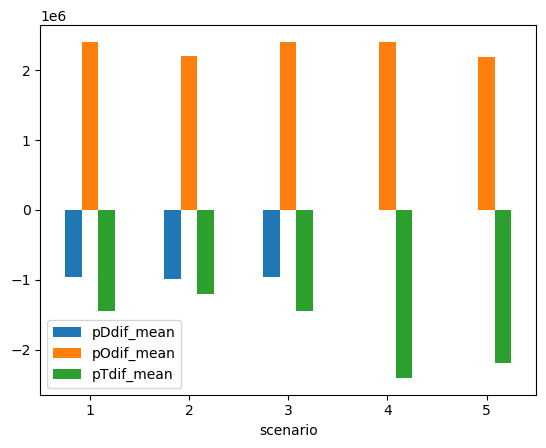

In [12]:
df2[(df2['vac']=='HPV')&(df2['g']==0.2)].plot(x='scenario',y=['pDdif_mean','pOdif_mean','pTdif_mean'], kind='bar', rot=0)

In [13]:
vaclist=list(df['vac'].unique())
glist=list(df['g'].unique().round(1).tolist())
scenariolist=list(df['scenario'].unique())
scenariolist.sort()

In [14]:
vaclist

['HPV', 'IPV', 'Measles', 'MR', 'PCV', 'Penta', 'Rota', 'TT', 'YF']

In [15]:
pd.set_option('display.precision', 3)
df2[['vac','g','scenario','pDdif_mean','pOdif_mean','pTdif_mean']]

vac    g  scenario  pDdif_mean  pOdif_mean  pTdif_mean
0    HPV  0.0         1         0.0   0.000e+00   0.000e+00
1    HPV  0.0         2         0.0   0.000e+00   0.000e+00
2    HPV  0.0         3         0.0   0.000e+00   0.000e+00
3    HPV  0.0         4         0.0   0.000e+00   0.000e+00
4    HPV  0.0         5         0.0   0.000e+00   0.000e+00
..   ...  ...       ...         ...         ...         ...
291   YF  1.0         1         0.0   4.320e+07  -3.958e+07
292   YF  1.0         2         0.0   3.966e+07  -4.325e+07
293   YF  1.0         3         0.0   4.695e+07  -3.973e+07
294   YF  1.0         4         0.0   4.675e+07  -4.316e+07
295   YF  1.0         5         0.0   4.145e+07  -4.683e+07

[296 rows x 6 columns]

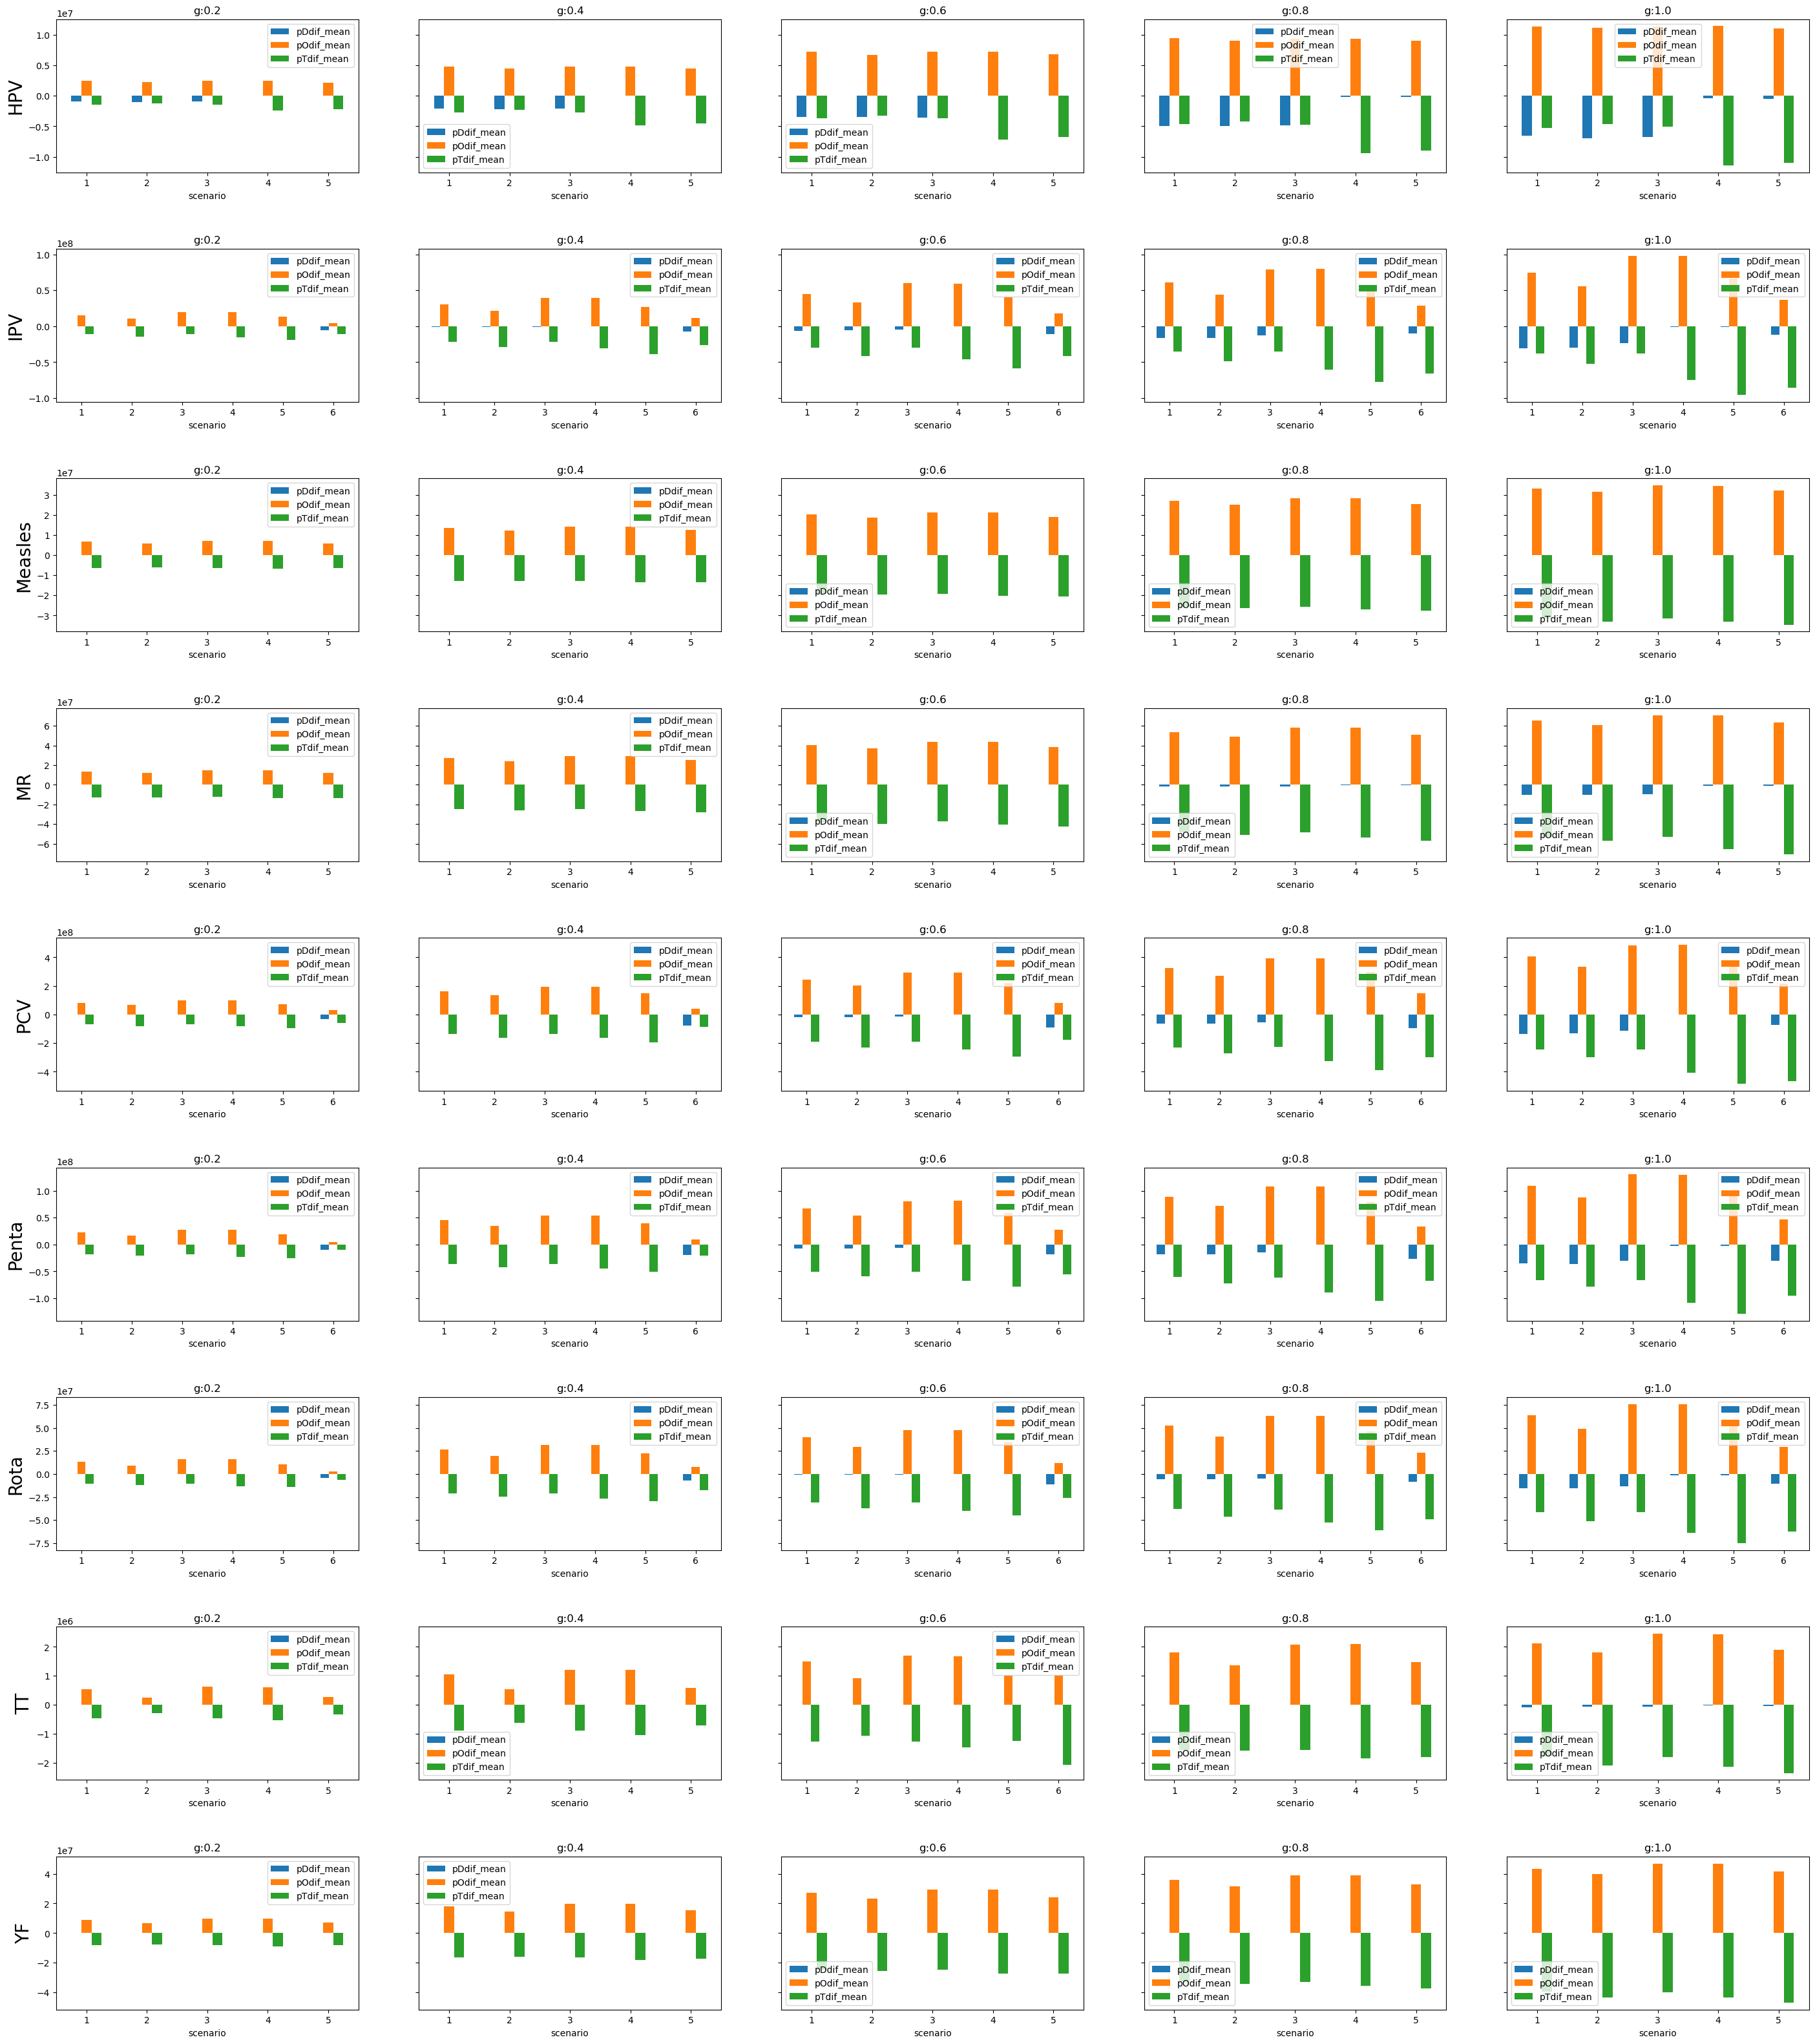

In [16]:
#import pandas as pd
#import matplotlib.pyplot as plt

fig, axes = plt.subplots( nrows=len(vaclist), ncols=len(glist)-1, sharey='row',figsize=(35, 40))

for vc in vaclist:
    for g in glist[1:]:
        df2[(df2['vac']==vc)&(df2['g']==g)].plot(x='scenario',y=['pDdif_mean','pOdif_mean','pTdif_mean'], kind='bar', rot=0, ax=axes[vaclist.index(vc)][glist.index(g)-1])
        axes[vaclist.index(vc)][glist.index(g)-1].set_title(f"g:{g}")
        fig.subplots_adjust(hspace=.5)
    axes[vaclist.index(vc),0].set_ylabel(f'{vc}', rotation=90, size=20)
plt.show()


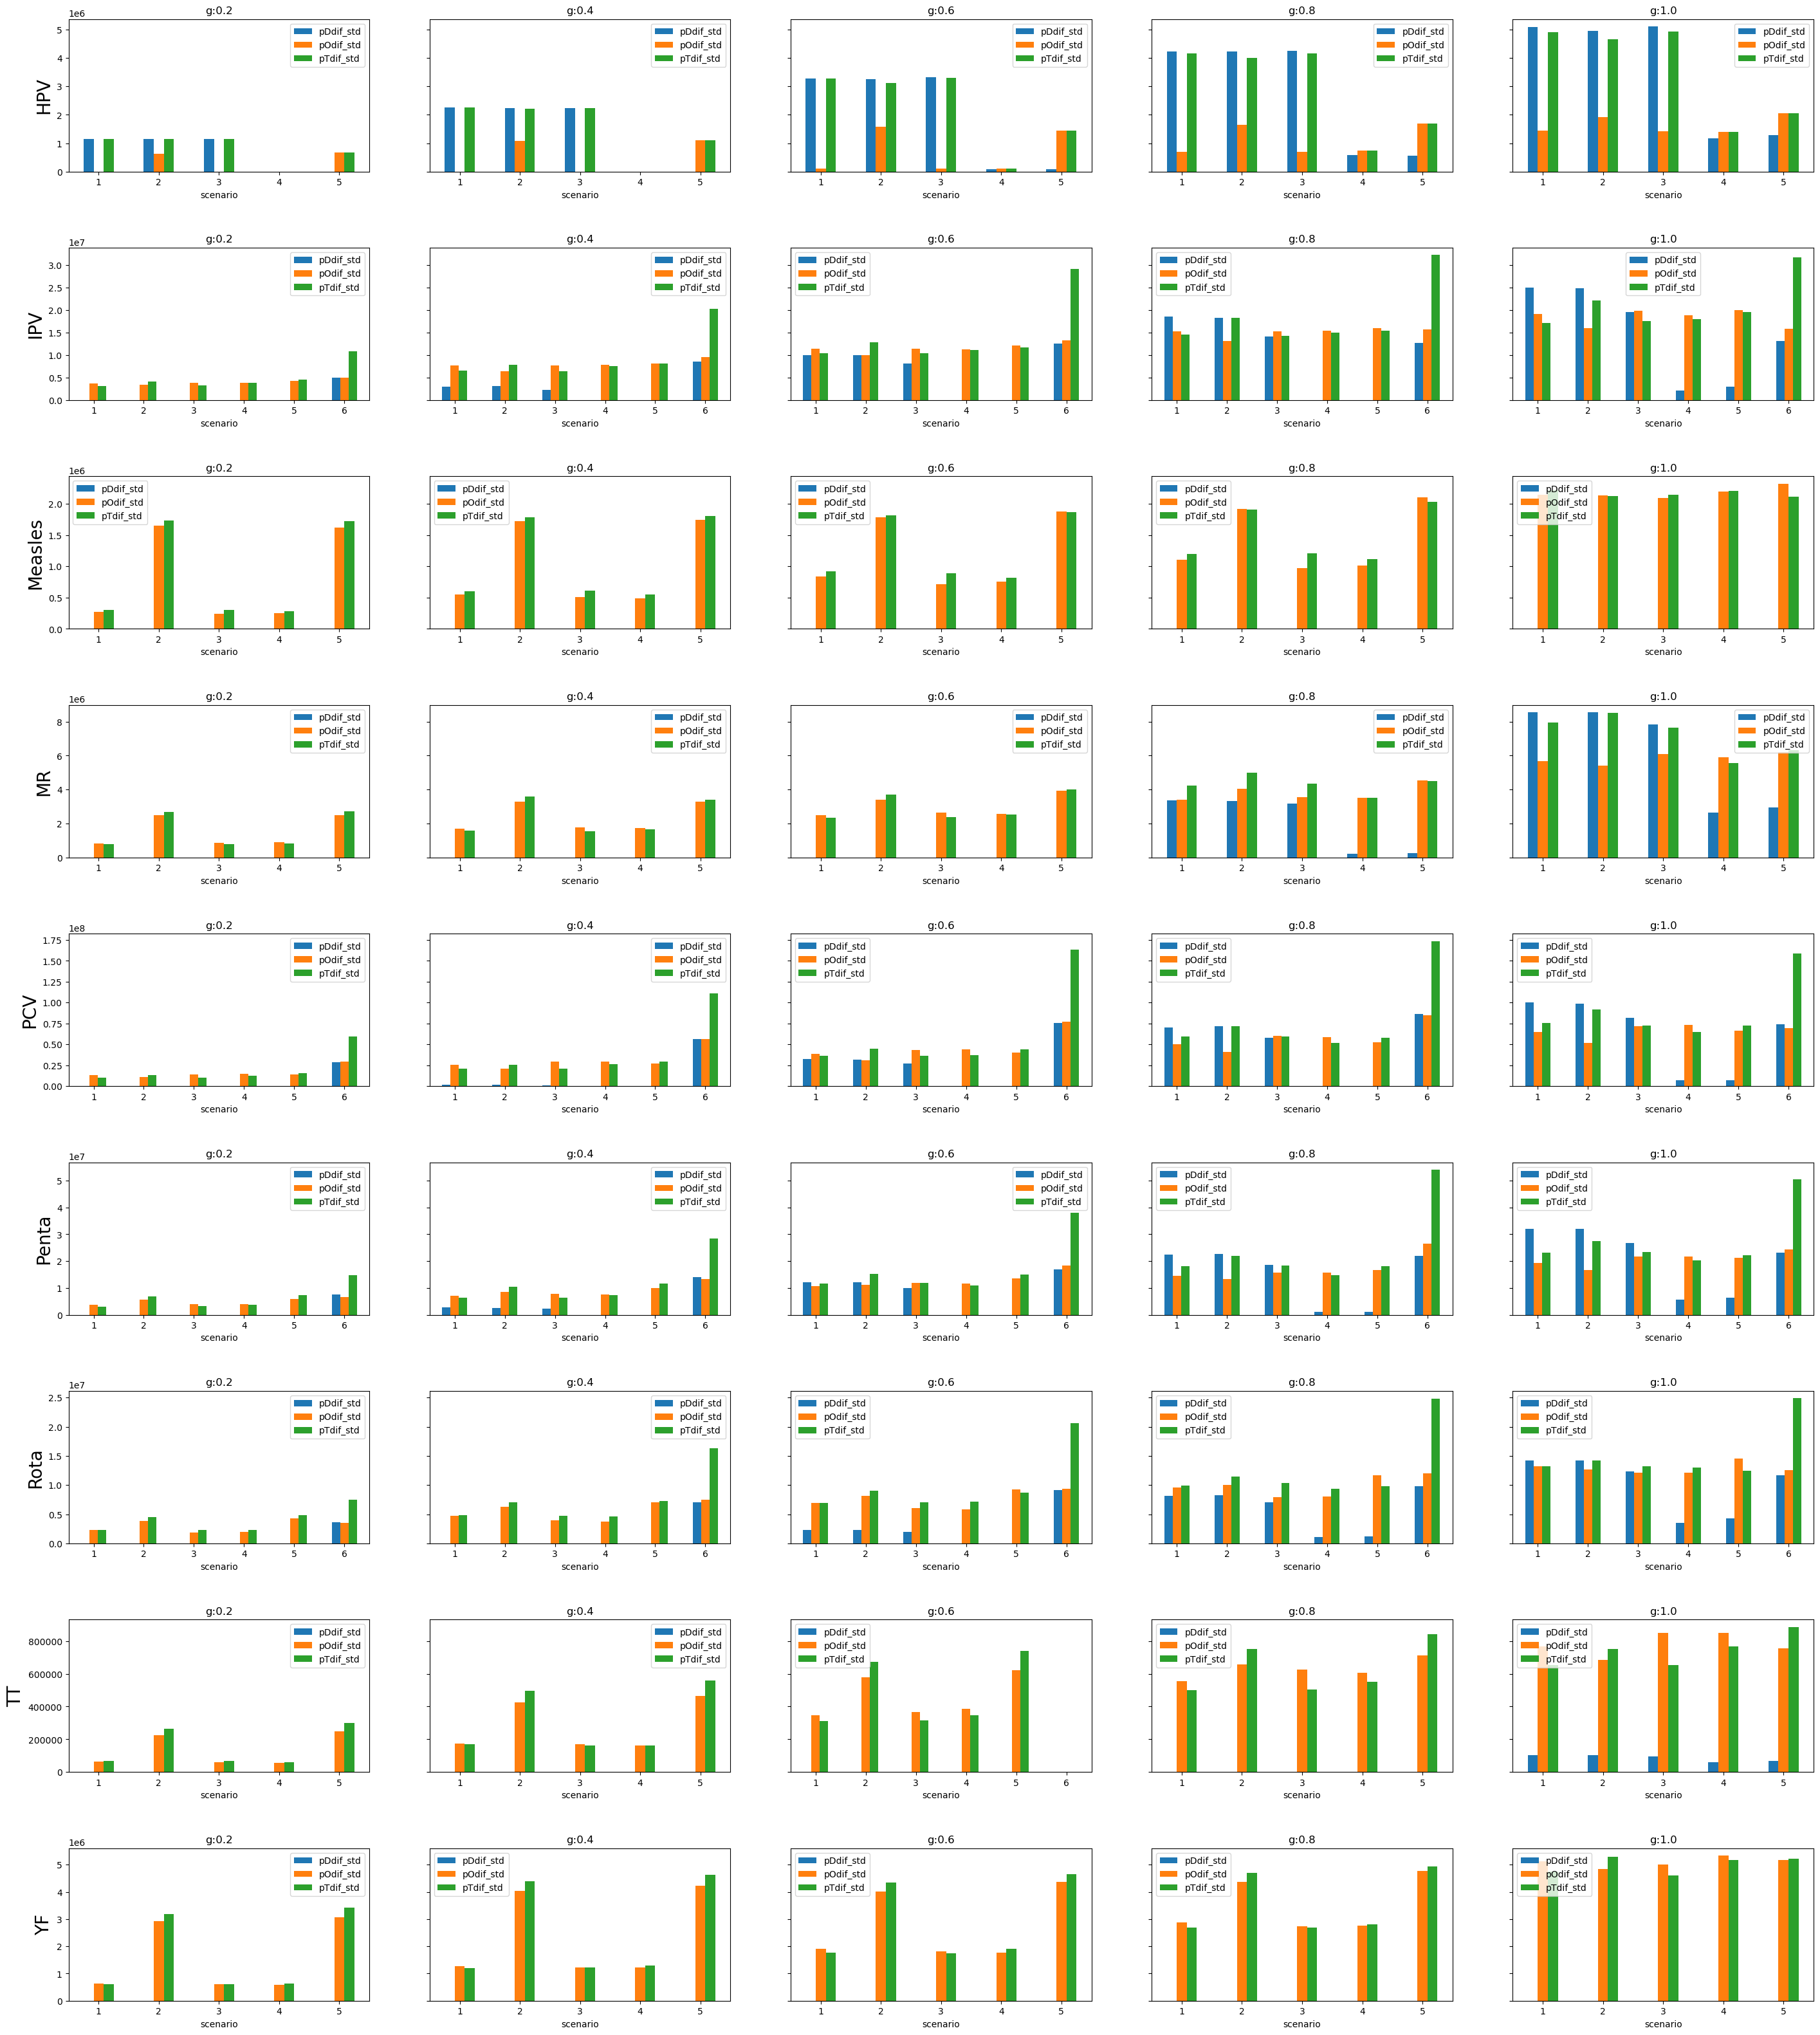

In [17]:
fig, axes = plt.subplots( nrows=len(vaclist), ncols=len(glist)-1, sharey='row',figsize=(35, 40) )

for vc in vaclist:
    for g in glist[1:]:
        df2[(df2['vac']==vc)&(df2['g']==g)].plot(x='scenario',y=['pDdif_std','pOdif_std','pTdif_std'], kind='bar', rot=0, ax=axes[vaclist.index(vc)][glist.index(g)-1])
        axes[vaclist.index(vc)][glist.index(g)-1].set_title(f"g:{g}")
        fig.subplots_adjust(hspace=.5)
    axes[vaclist.index(vc),0].set_ylabel(f'{vc}', rotation=90, size=20)
plt.show()

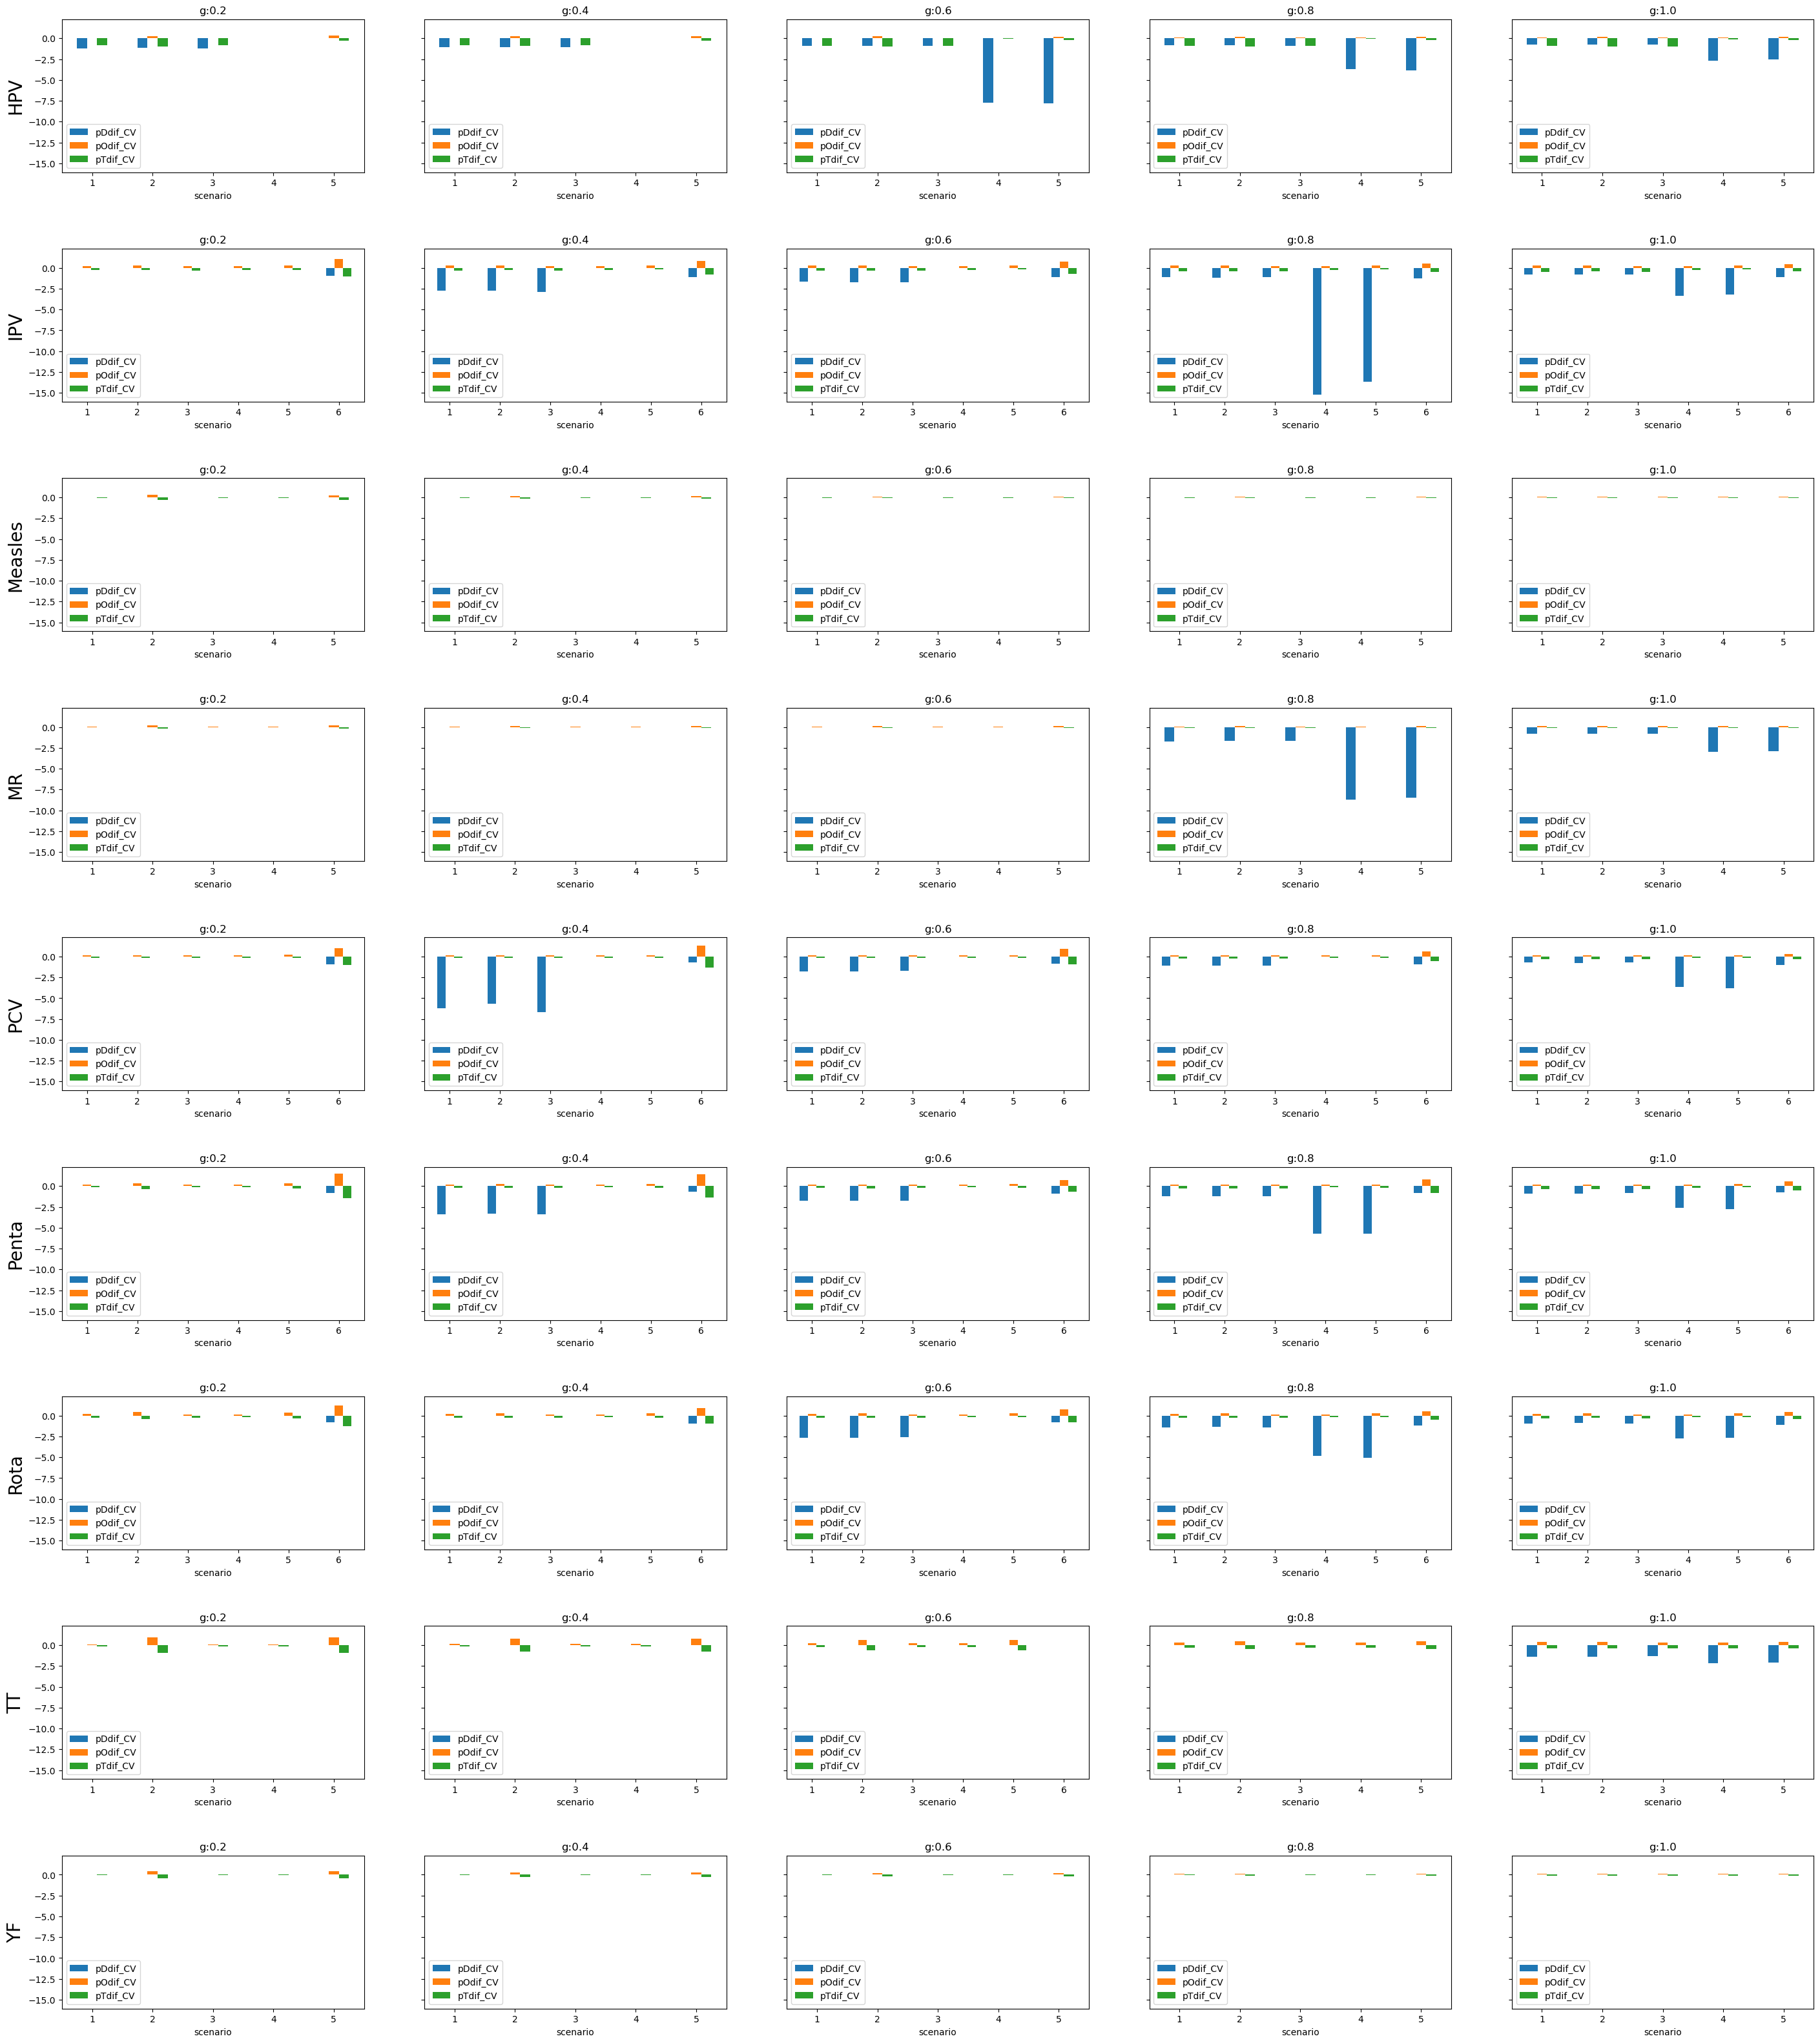

In [18]:
fig, axes = plt.subplots( nrows=len(vaclist), ncols=len(glist)-1, sharey='all',figsize=(35, 40) )

for vc in vaclist:
    for g in glist[1:]:
        df2[(df2['vac']==vc)&(df2['g']==g)].plot(x='scenario',y=['pDdif_CV','pOdif_CV','pTdif_CV'], kind='bar', rot=0, ax=axes[vaclist.index(vc)][glist.index(g)-1])
        axes[vaclist.index(vc)][glist.index(g)-1].set_title(f"g:{g}")
        fig.subplots_adjust(hspace=.5)
    axes[vaclist.index(vc),0].set_ylabel(f'{vc}', rotation=90, size=20)
plt.show()

In [19]:
df2.columns

Index(['vac', 'g', 'scenario', 'pDdif_mean', 'pDdif_std', 'pDdif_count',
       'pOdif_mean', 'pOdif_std', 'pOdif_count', 'pTdif_mean', 'pTdif_std',
       'pTdif_count', 'benefit_mean', 'benefit_std', 'benefit_count',
       'ben_mv_mean', 'ben_mv_std', 'ben_mv_count', 'marketvalue_o_mean',
       'marketvalue_o_std', 'marketvalue_o_count', 'pDdif_CV', 'pOdif_CV',
       'pTdif_CV', 'pDdif_se', 'pOdif_se', 'pTdif_se'],
      dtype='object')

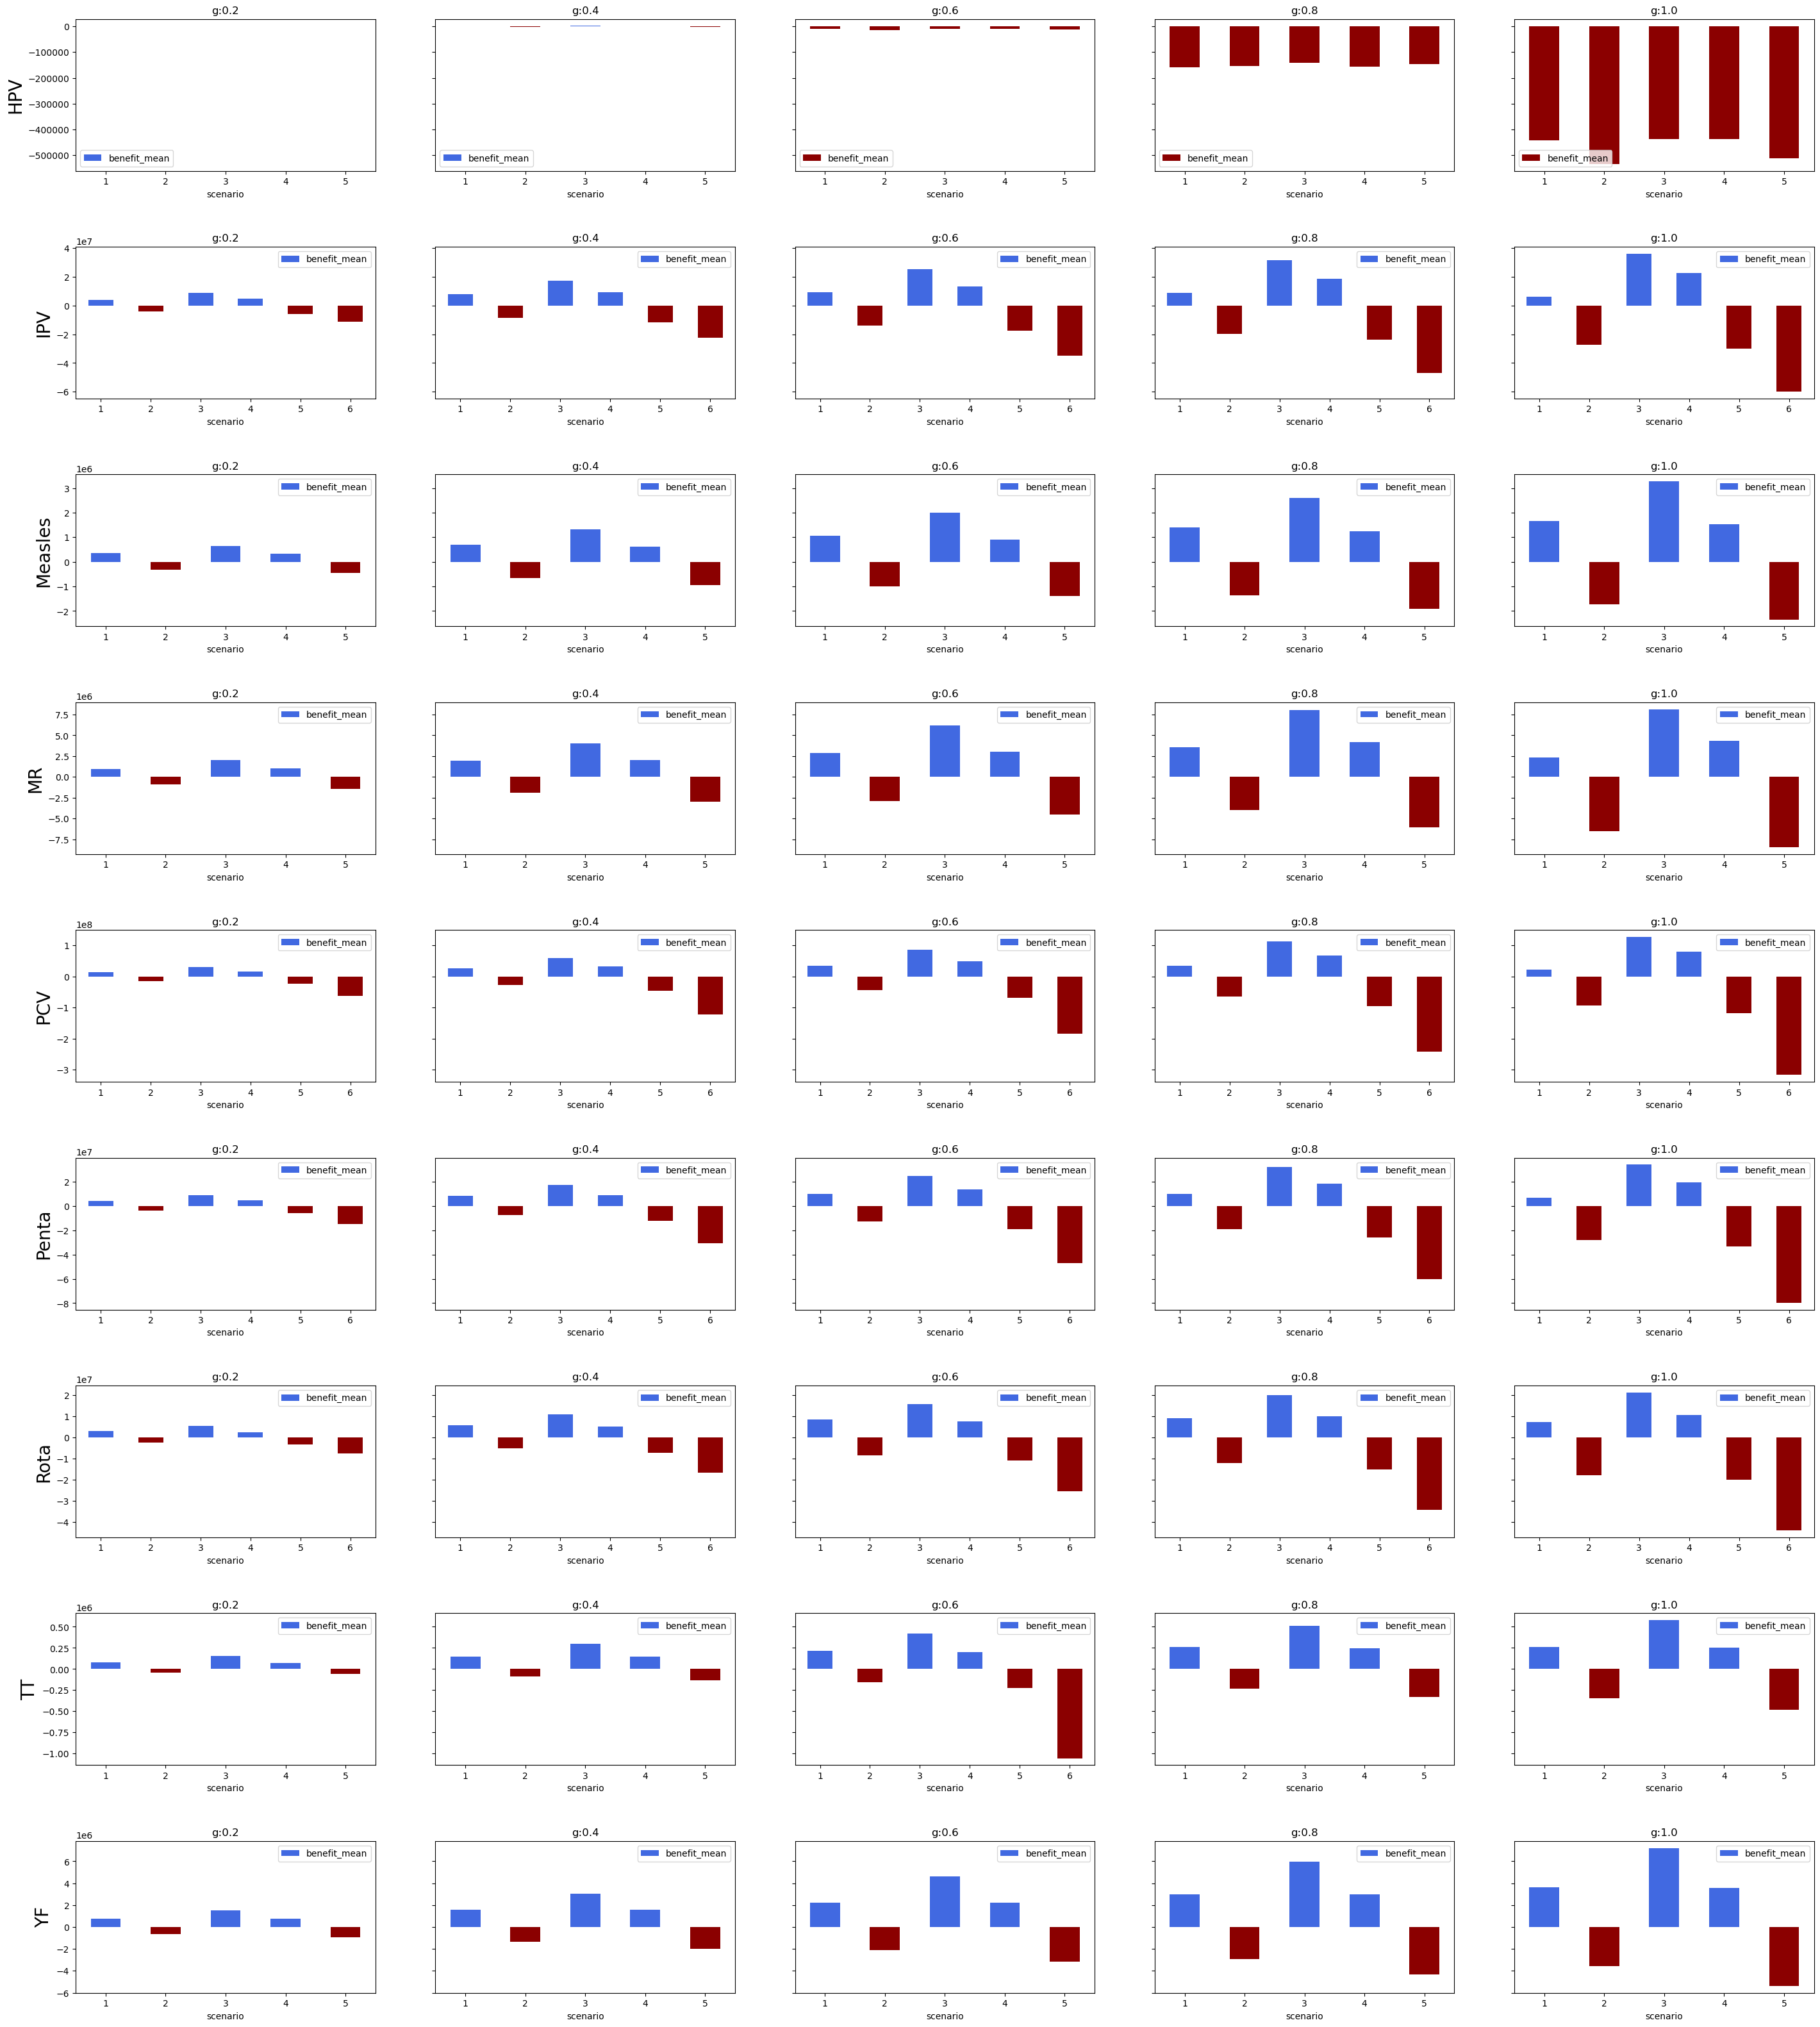

In [20]:
fig, axes = plt.subplots( nrows=len(vaclist), ncols=len(glist)-1, sharey='row',figsize=(35, 40) )

for vc in vaclist:
    for g in glist[1:]:
        df2[(df2['vac']==vc)&(df2['g']==g)].plot(x='scenario',y='benefit_mean', kind='bar', rot=0, ax=axes[vaclist.index(vc)][glist.index(g)-1], color=np.where(df2[(df2['vac']==vc)&(df2['g']==g)].benefit_mean < 0, 'darkred', 'royalblue'))
        axes[vaclist.index(vc)][glist.index(g)-1].set_title(f"g:{g}")
        fig.subplots_adjust(hspace=.5)
    axes[vaclist.index(vc),0].set_ylabel(f'{vc}', rotation=90, size=20)
plt.show()

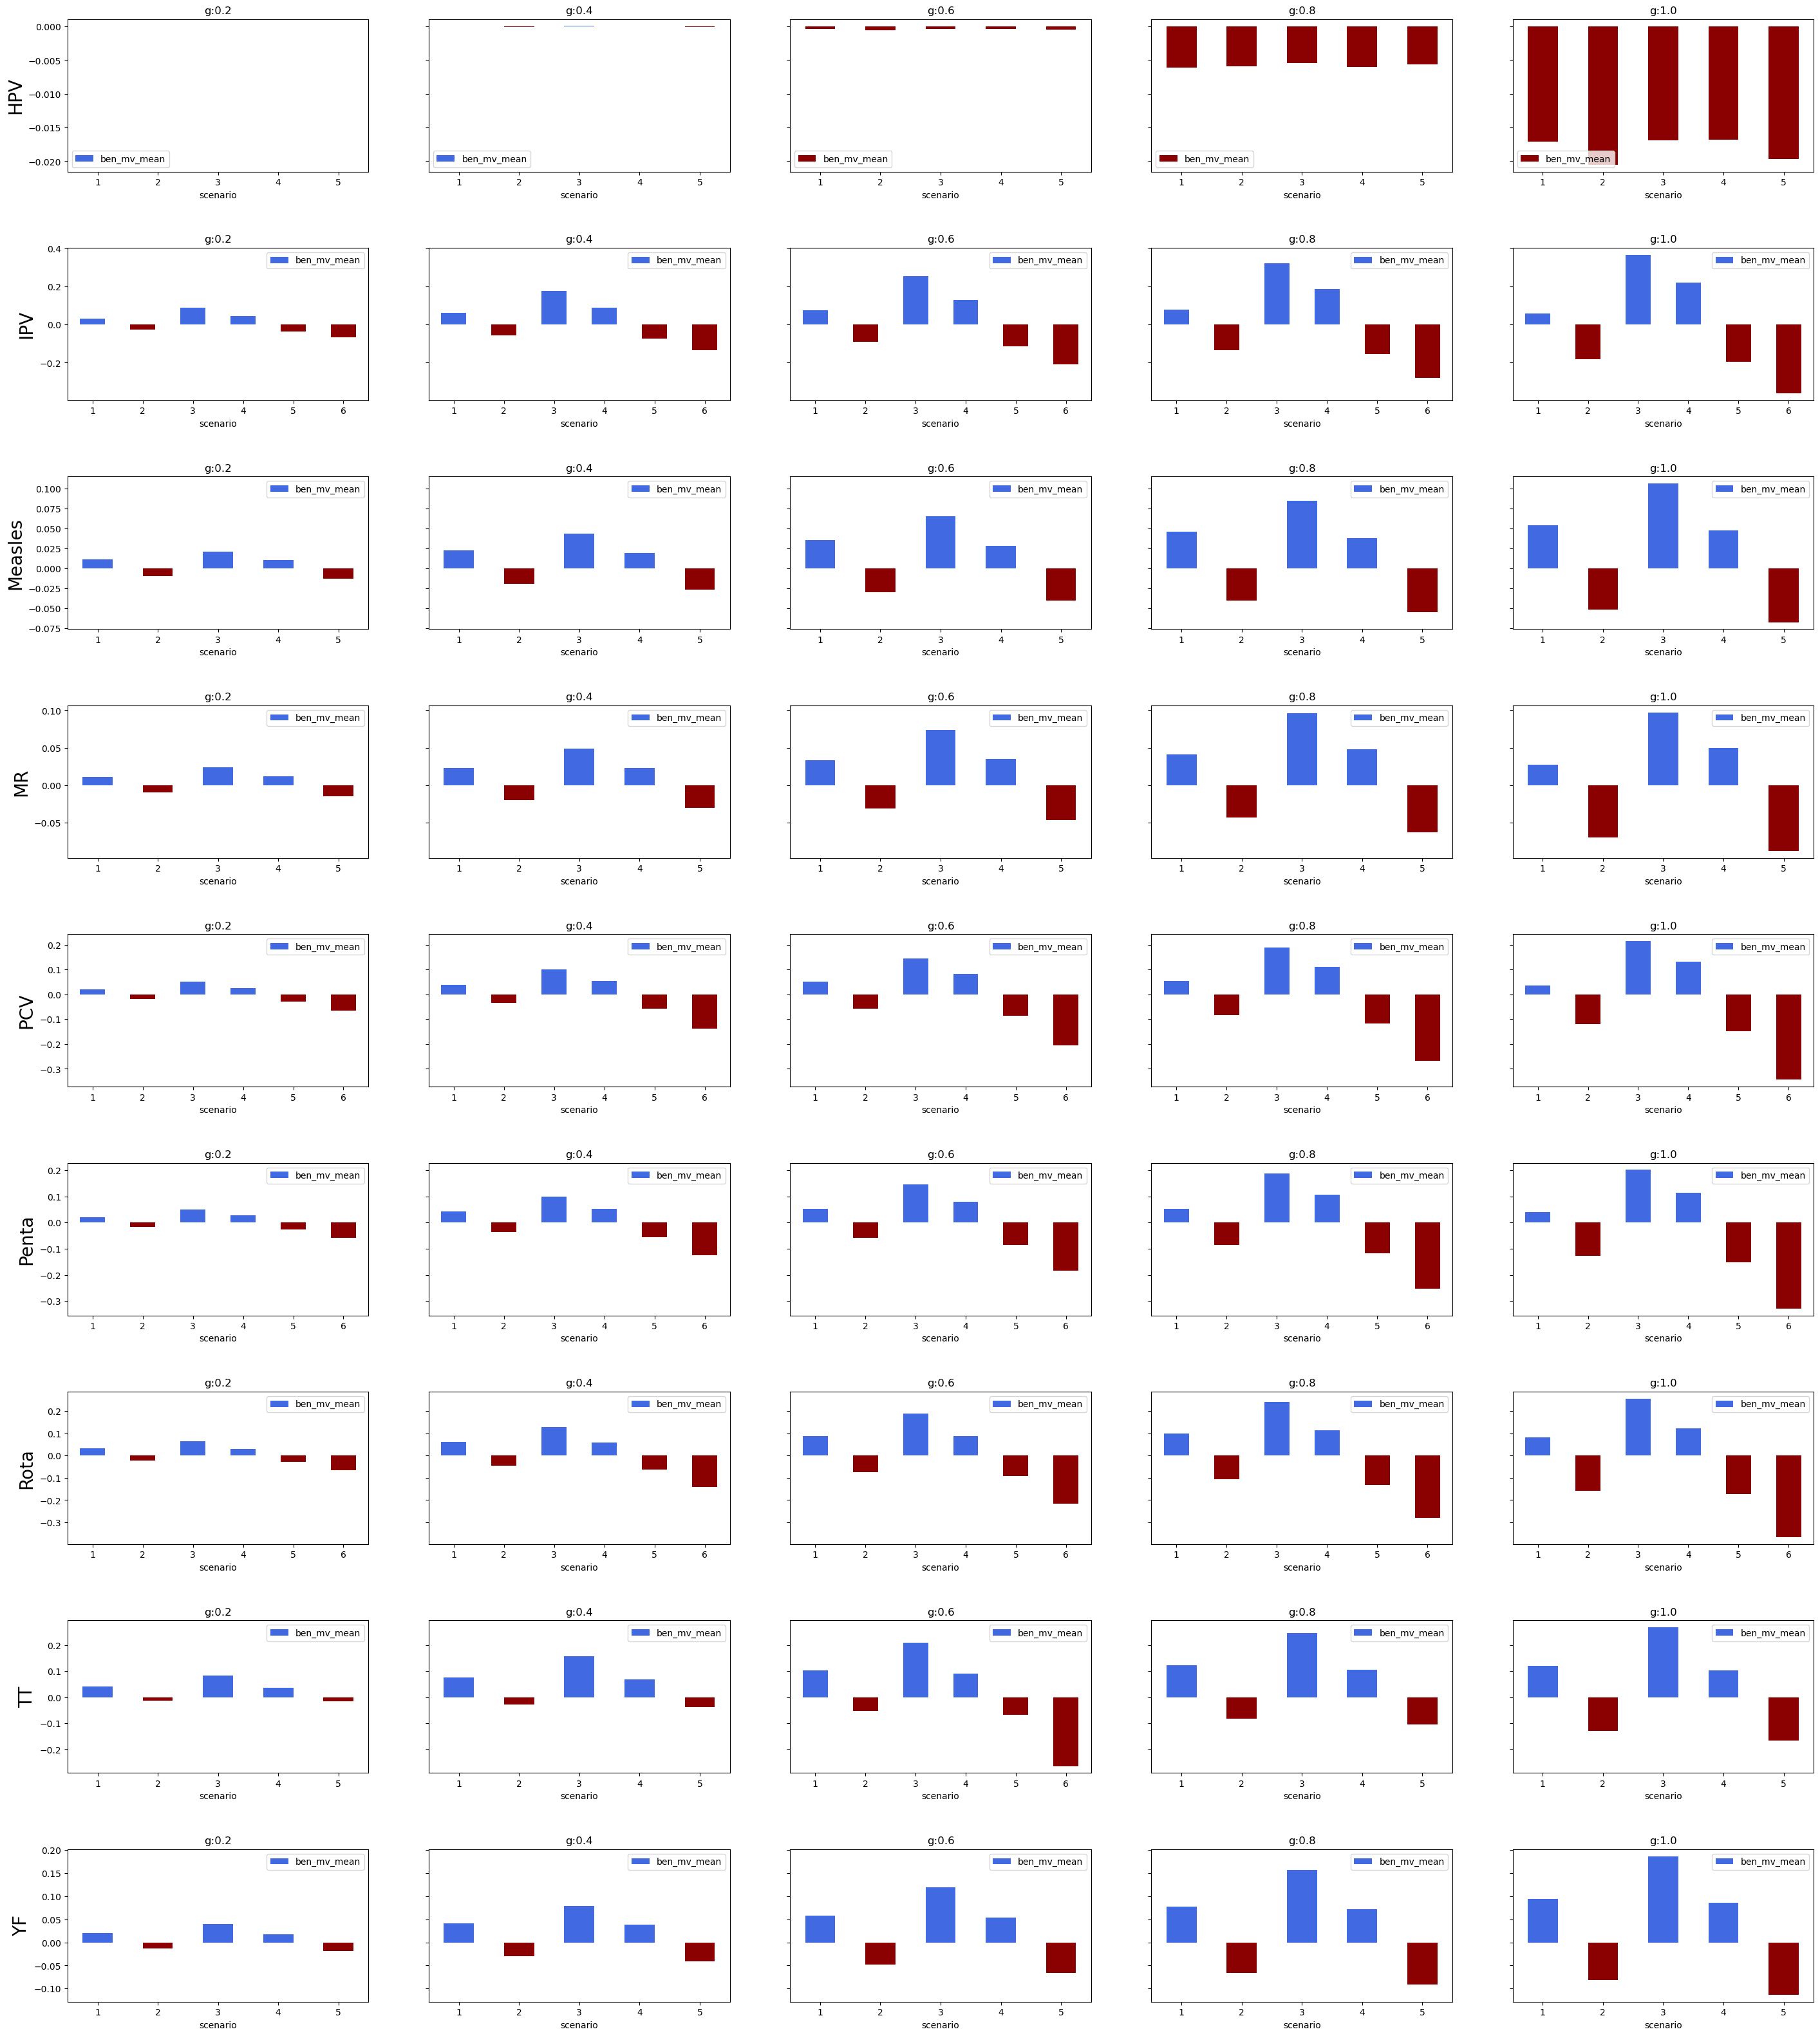

In [21]:
fig, axes = plt.subplots( nrows=len(vaclist), ncols=len(glist)-1, sharey='row',figsize=(35, 40) )

for vc in vaclist:
    for g in glist[1:]:
        df2[(df2['vac']==vc)&(df2['g']==g)].plot(x='scenario',y='ben_mv_mean', kind='bar', rot=0, ax=axes[vaclist.index(vc)][glist.index(g)-1], color=np.where(df2[(df2['vac']==vc)&(df2['g']==g)].benefit_mean < 0, 'darkred', 'royalblue'))
        axes[vaclist.index(vc)][glist.index(g)-1].set_title(f"g:{g}")
        fig.subplots_adjust(hspace=.5)
    axes[vaclist.index(vc),0].set_ylabel(f'{vc}', rotation=90, size=20)
plt.show()

In [22]:
import seaborn as sns

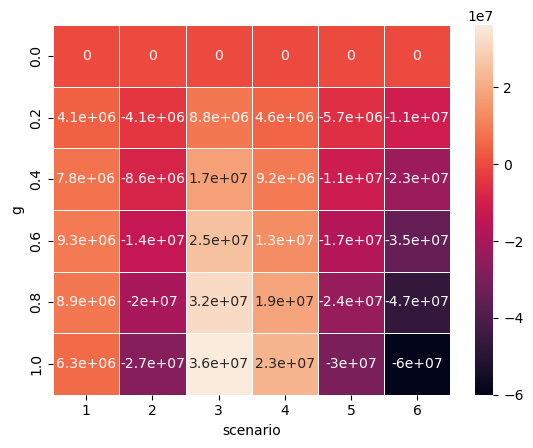

In [23]:
dfint=df2[(df2['vac']=='IPV')].pivot(index="g", columns="scenario", values="benefit_mean")
ax = sns.heatmap(dfint, annot=True, linewidth=.5)


### Table 4. Data used to generate Table 4. Market value and minimum and maximum *absolute* benefits for different vaccines and *g* levels

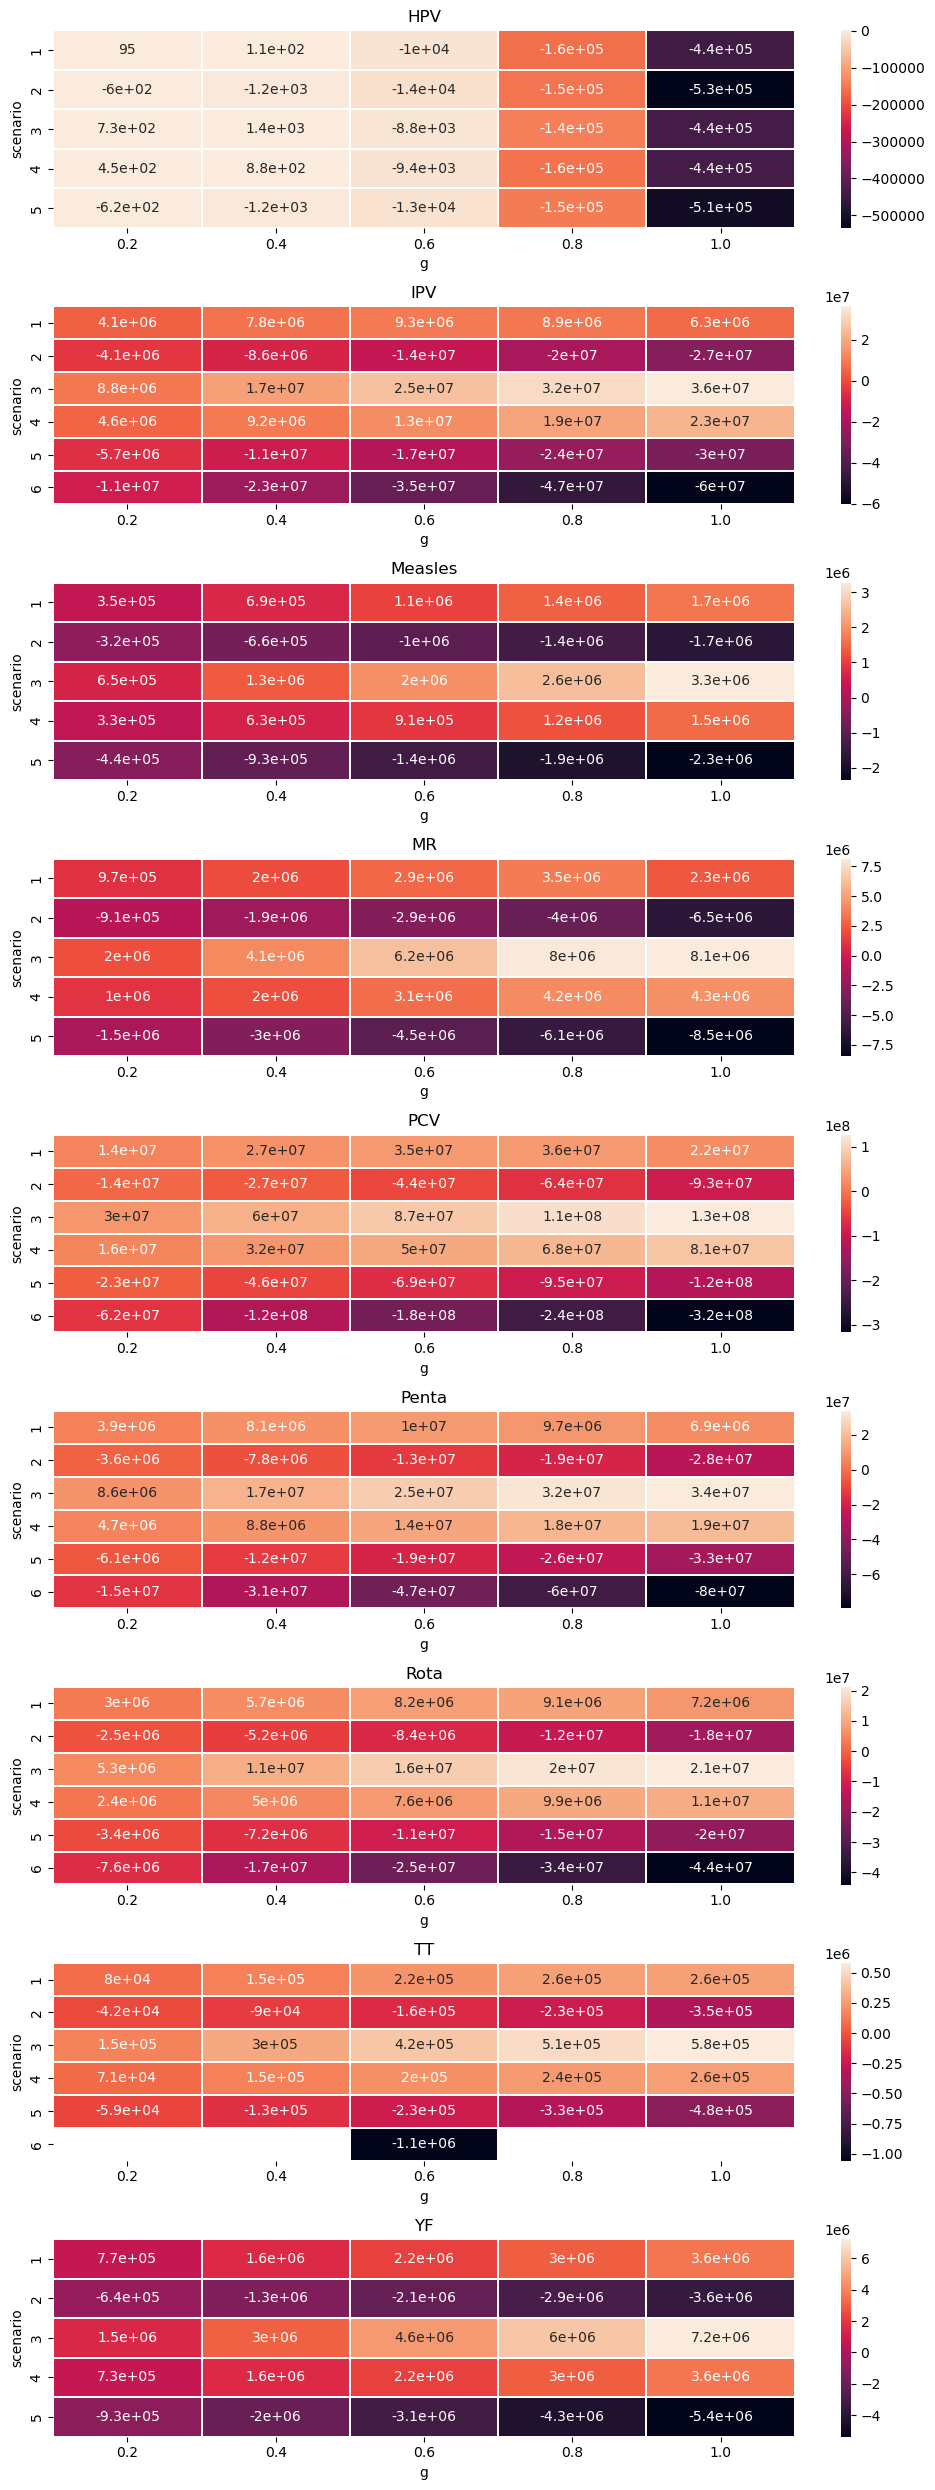

In [24]:
fig, axes = plt.subplots(9, 1, figsize=(10, 25))
 
i=0
for vc in vaclist:      
    dfint=df2[(df2['vac']==vc)&(df2['g']>0.00)].pivot(index="scenario", columns="g", values="benefit_mean")
    sns.heatmap(ax=axes[i], data=dfint,annot=True, linewidth=.1)#, vmin=-3.6e8, vmax=1.2e8)
    axes[i].set_title(vc)
    i=i+1
plt.tight_layout()
plt.show()

   
    


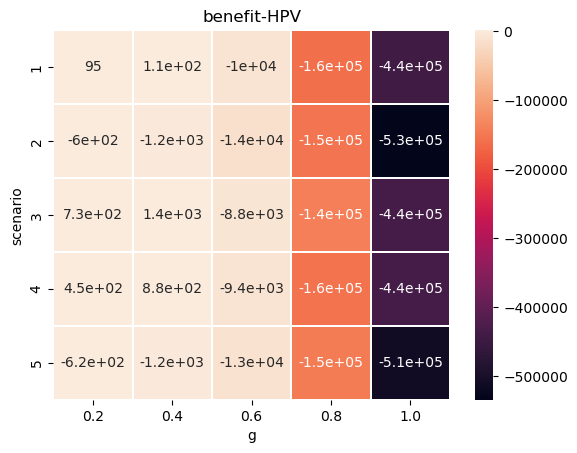

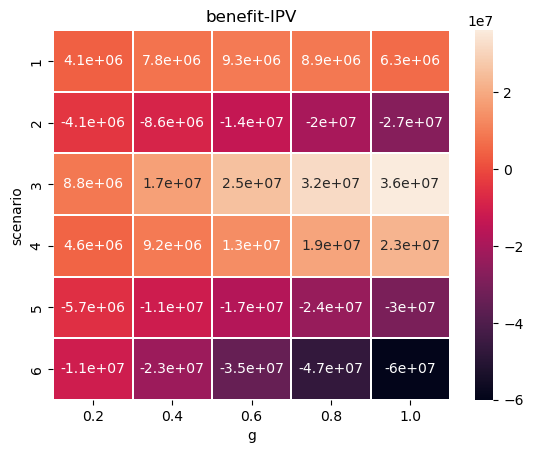

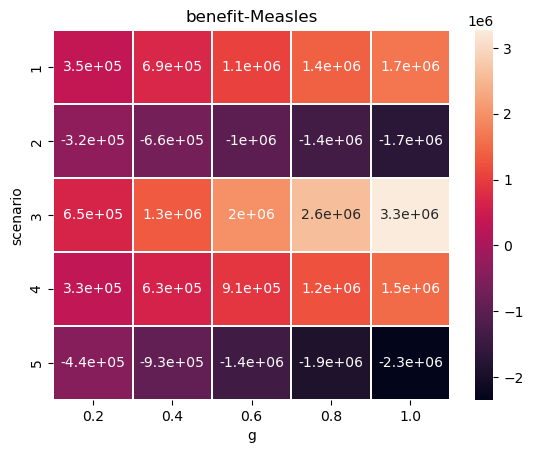

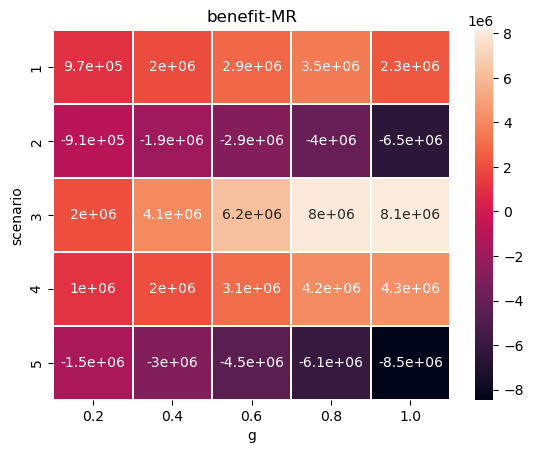

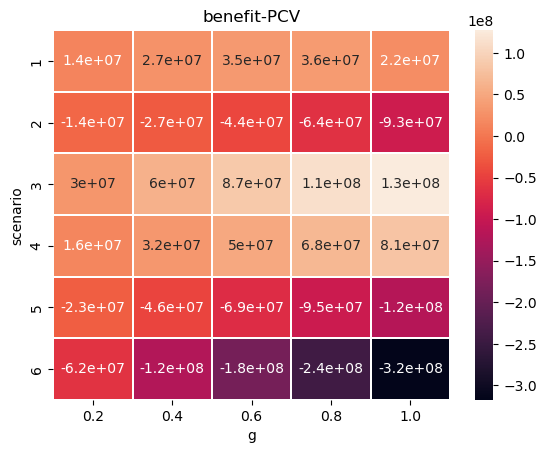

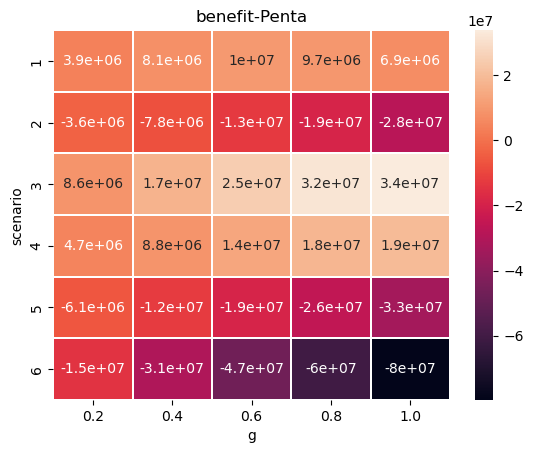

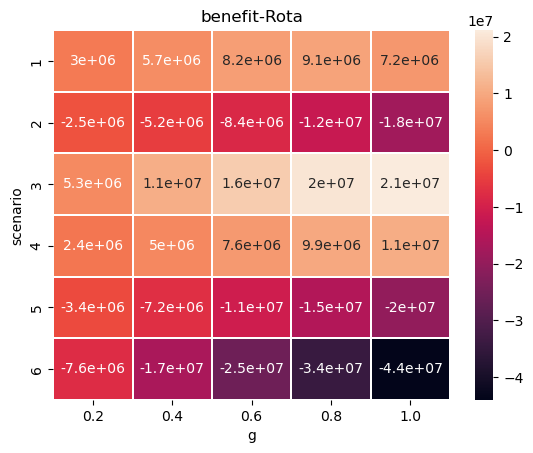

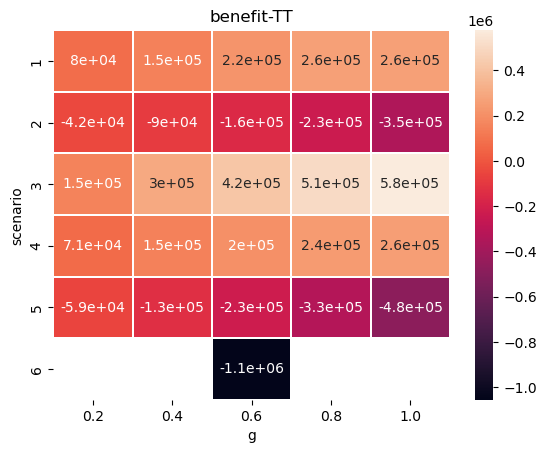

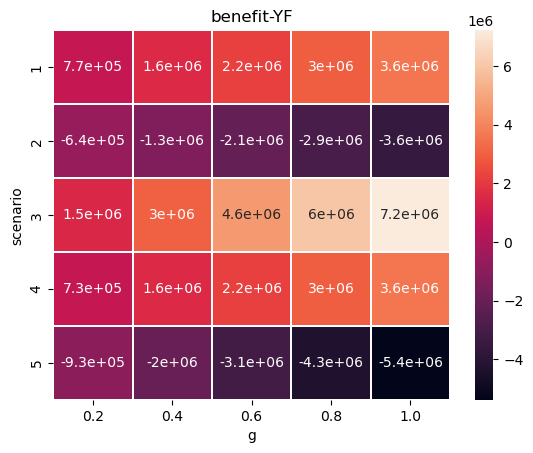

In [26]:
#fig, axes = plt.subplots(1, 1, figsize=(15, 10))
 
for vc in vaclist:      
    dfint=df2[(df2['vac']==vc)&(df2['g']>0.00)].pivot(index="scenario", columns="g", values="benefit_mean")
    ax=sns.heatmap(data=dfint,annot=True, linewidth=.1)#, vmin=-3.6e8, vmax=1.2e8)
    plt.title('benefit-'+ vc)
    #plt.tight_layout()
    plt.show()   
   


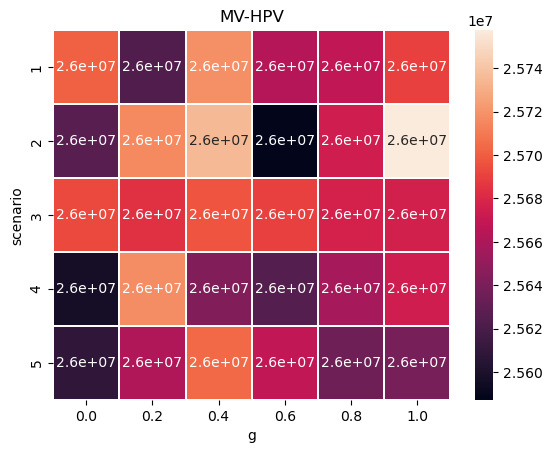

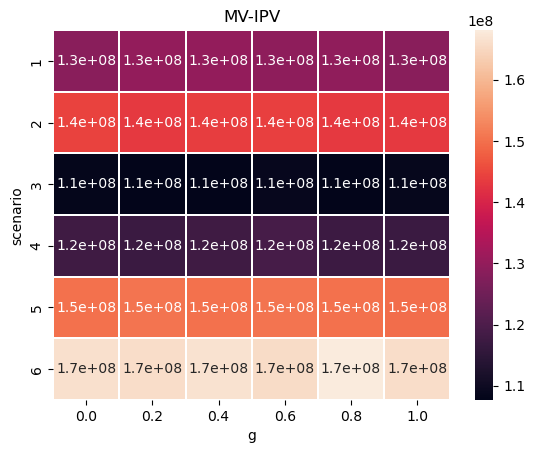

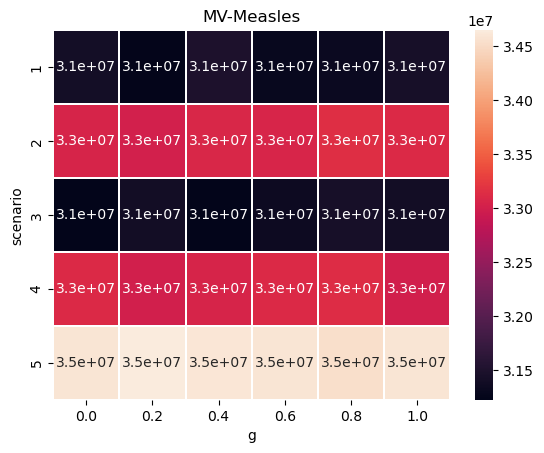

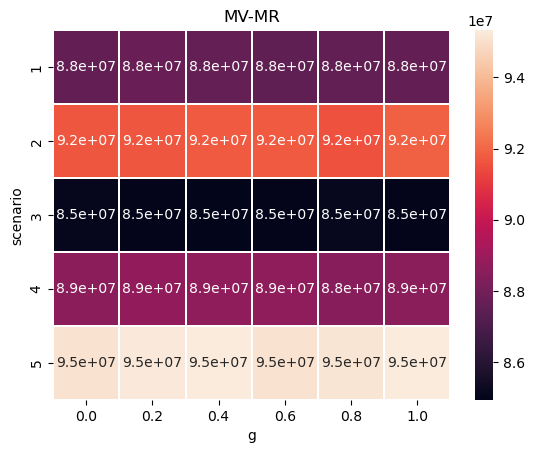

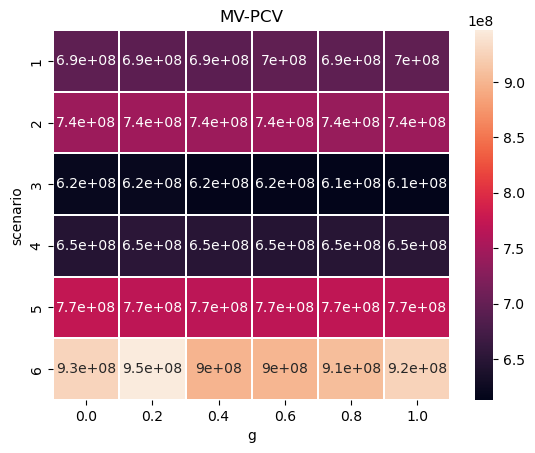

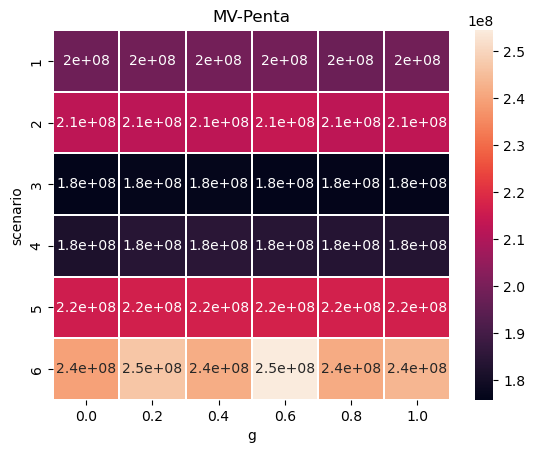

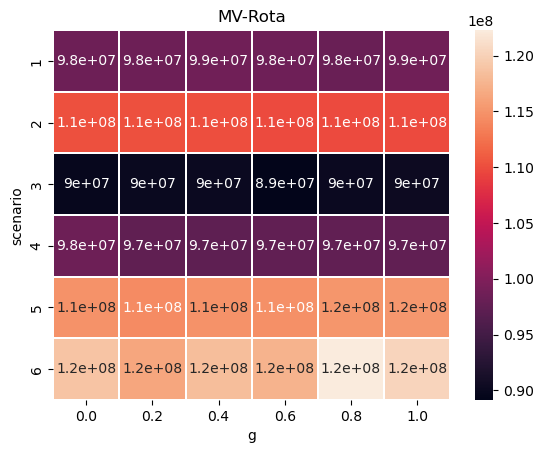

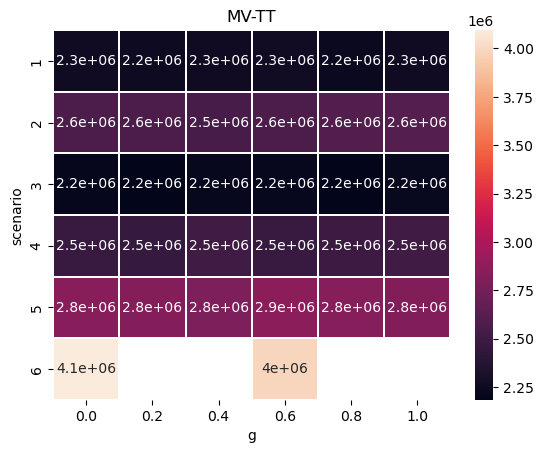

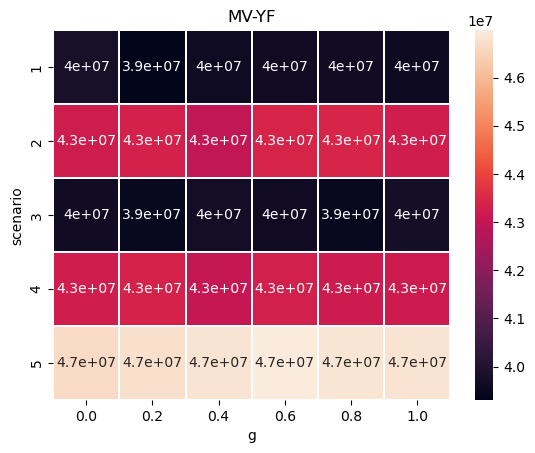

In [25]:
#fig, axes = plt.subplots(1, 1, figsize=(15, 10))
 
for vc in vaclist:      
    dfint=df2[(df2['vac']==vc)&(df2['g']>=0.00)].pivot(index="scenario", columns="g", values="marketvalue_o_mean")
    ax=sns.heatmap(data=dfint,annot=True, linewidth=.1)#, vmin=-3.6e8, vmax=1.2e8)
    plt.title('MV-'+ vc)
    #plt.tight_layout()
    plt.show()   
   

### Computing market values for each vaccine

In [31]:
df2.groupby(['vac'], as_index=False).agg({'marketvalue_o_mean':['mean']})                         



vac marketvalue_o_mean
                         mean
0      HPV          2.567e+07
1      IPV          1.359e+08
2       MR          8.964e+07
3  Measles          3.269e+07
4      PCV          7.315e+08
5    Penta          2.054e+08
6     Rota          1.049e+08
7       TT          2.568e+06
8       YF          4.250e+07

### Table 5.  Data used for preparing Table 5. Impact as a fraction of the vaccine maket value at benchmark level of *g*. (data presented as ratios. The paper presents data Table 5 as percentages)

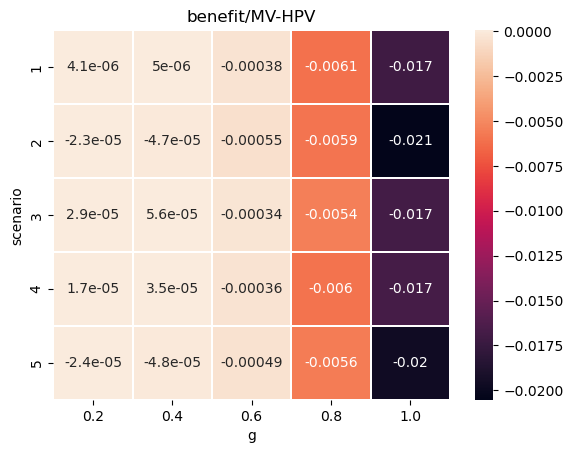

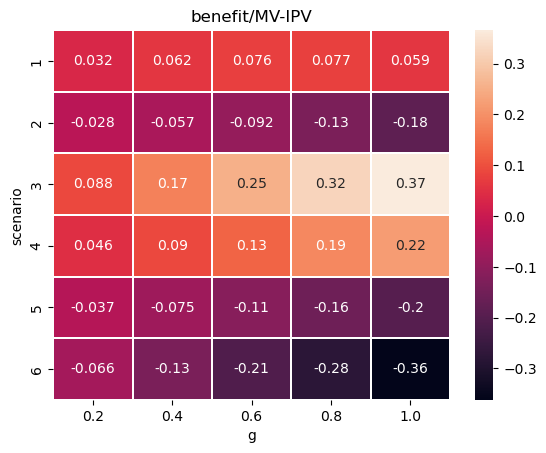

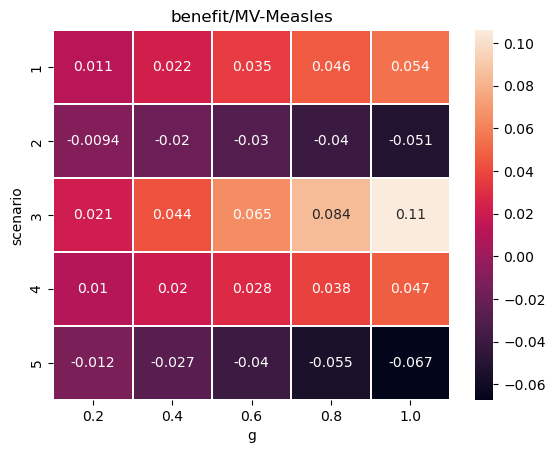

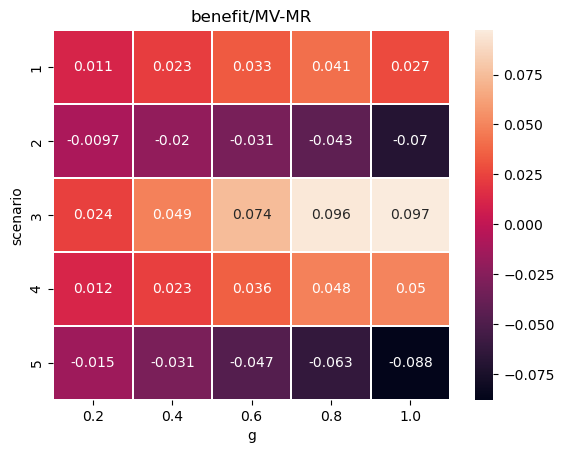

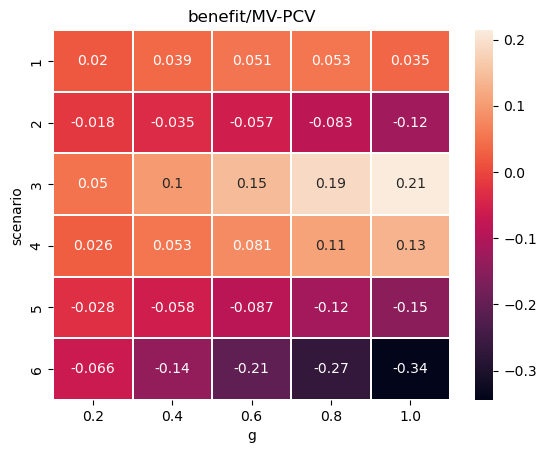

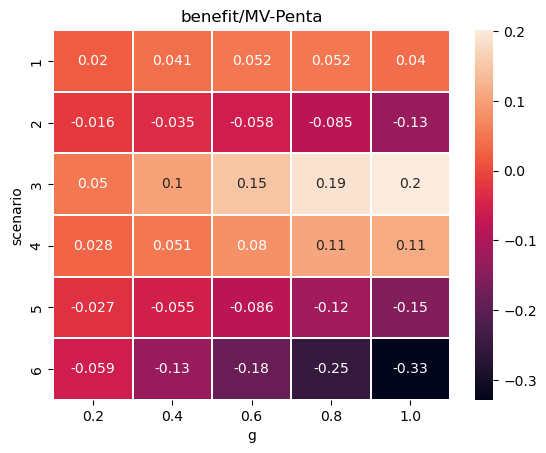

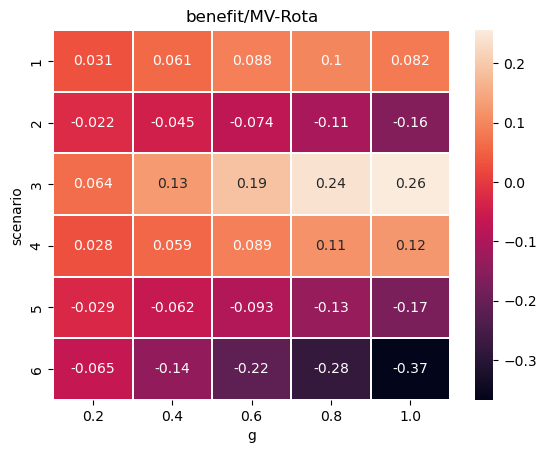

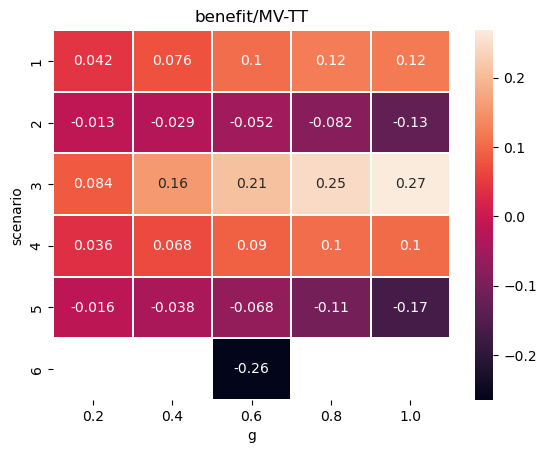

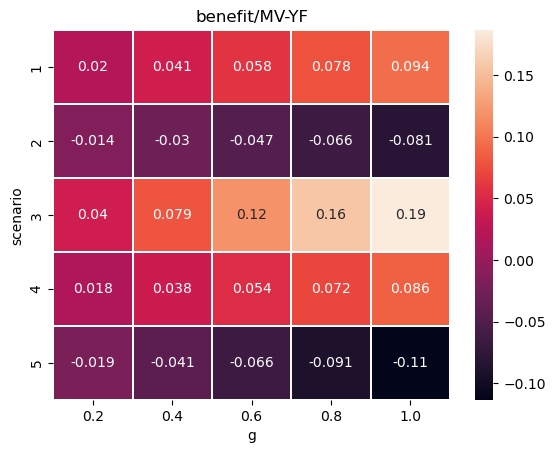

In [27]:
for vc in vaclist:      
    dfint=df2[(df2['vac']==vc)&(df2['g']>0.00)].pivot(index="scenario", columns="g", values="ben_mv_mean")
    ax=sns.heatmap(data=dfint,annot=True, linewidth=.1)#, vmin=-3.6e8, vmax=1.2e8)
    plt.title('benefit/MV-'+ vc)
    #plt.tight_layout()
    plt.show()   
   


### Figure 3 plots ( $\delta_i^j$)
Average net change in profit for vaccine $j$, under profit scenario $i$, for various supply goal levels, $g$.

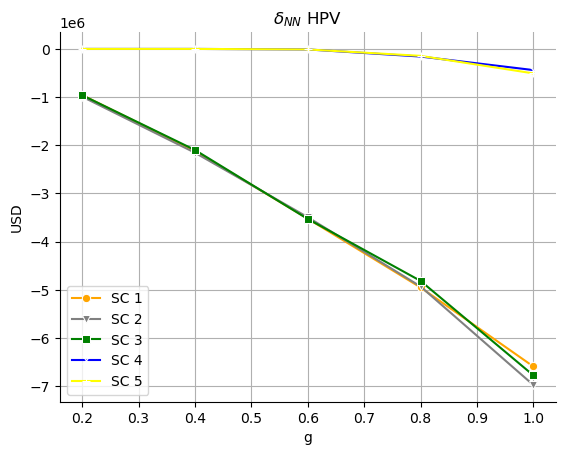

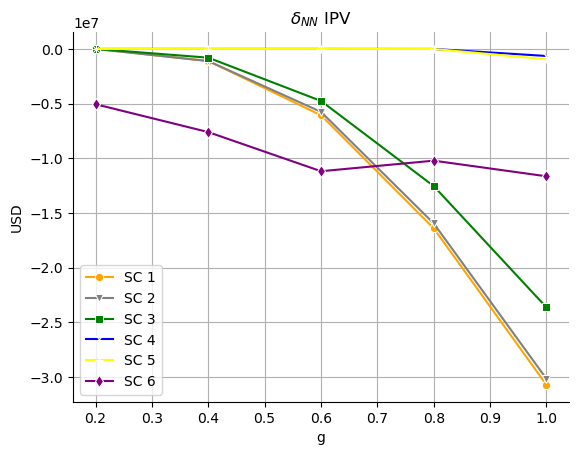

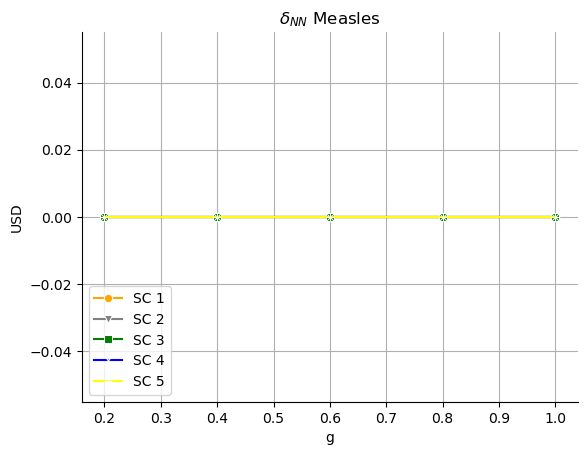

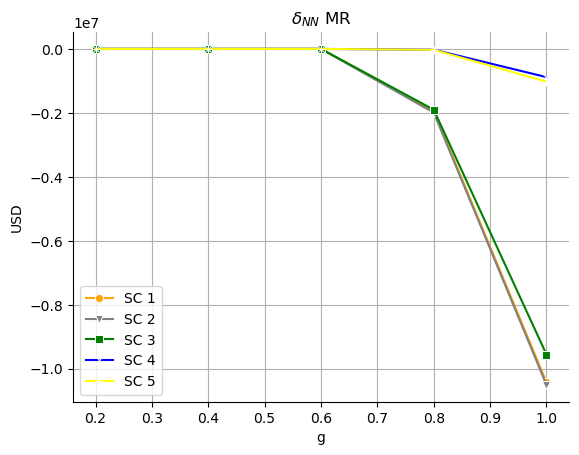

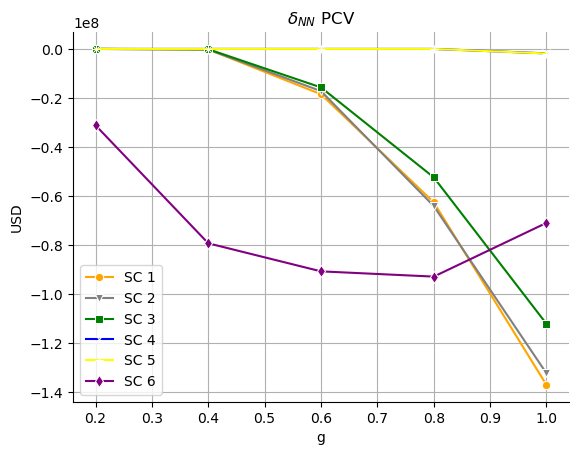

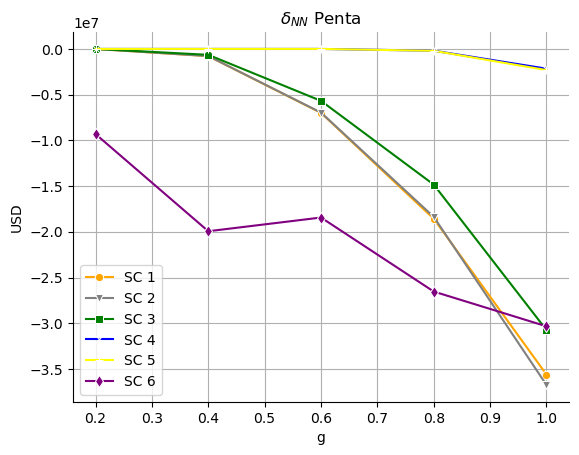

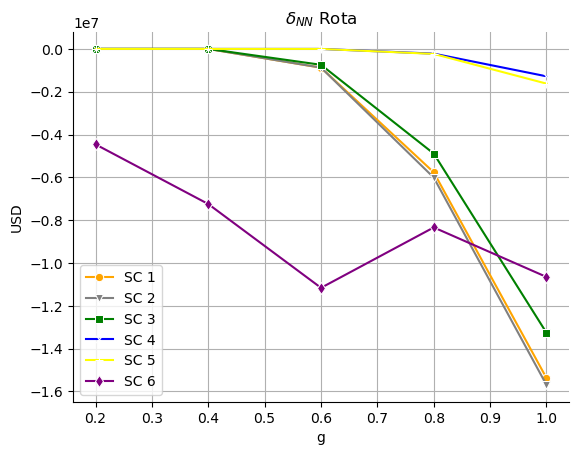

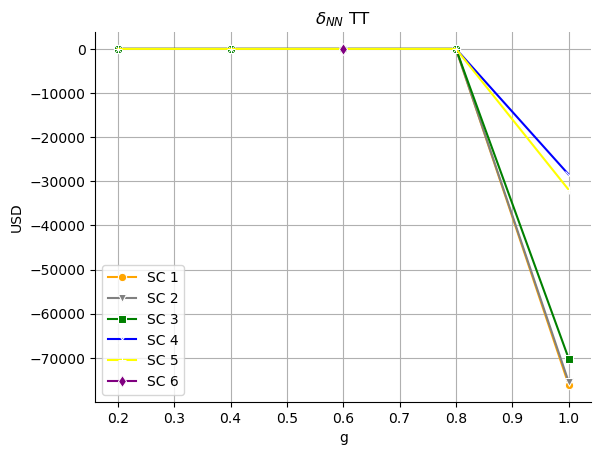

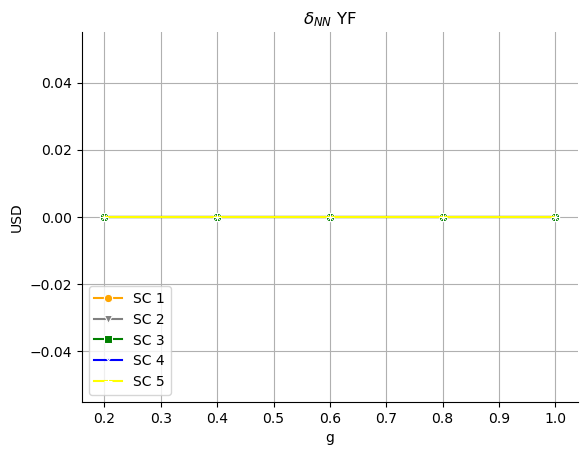

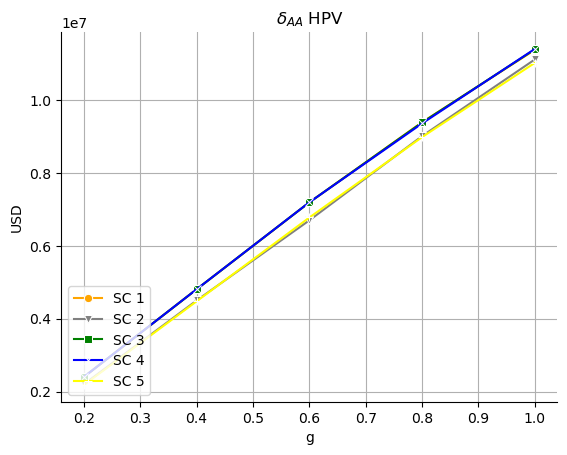

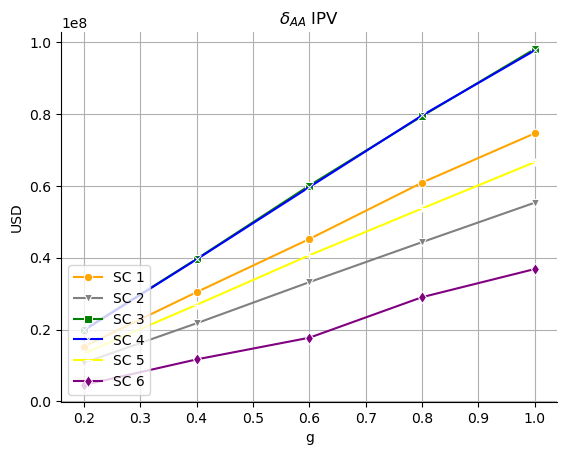

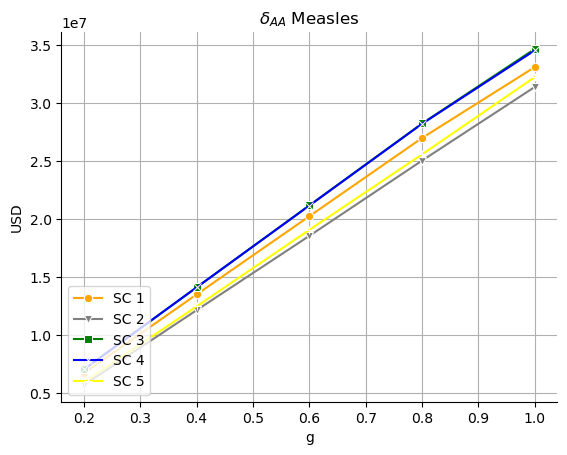

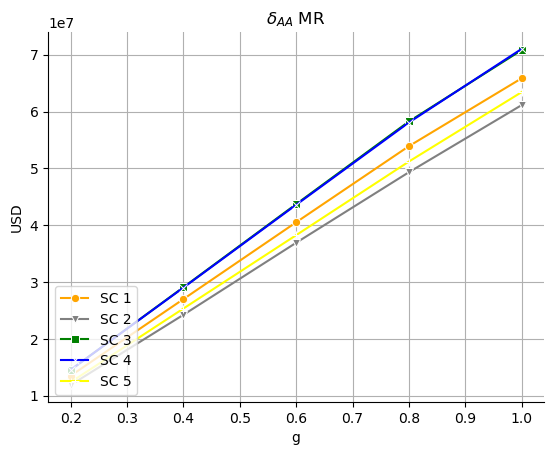

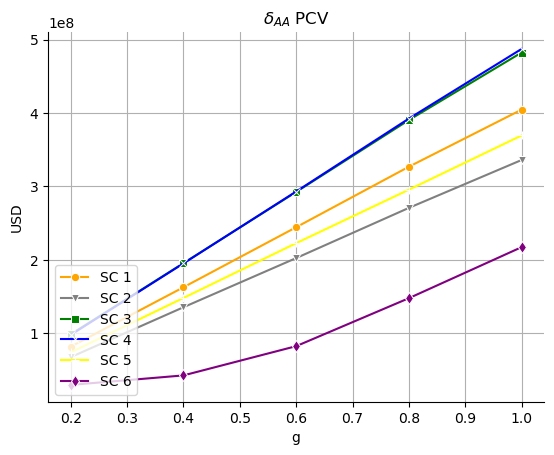

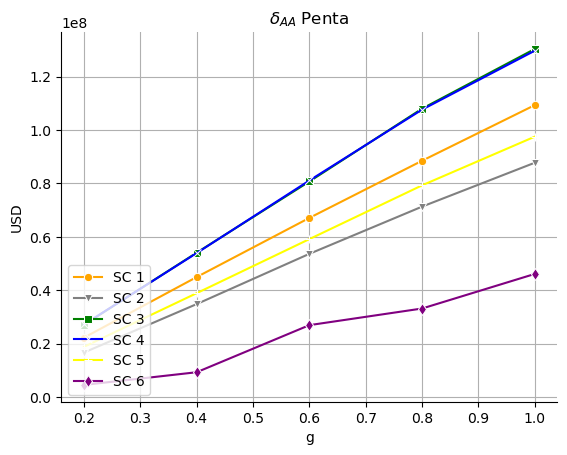

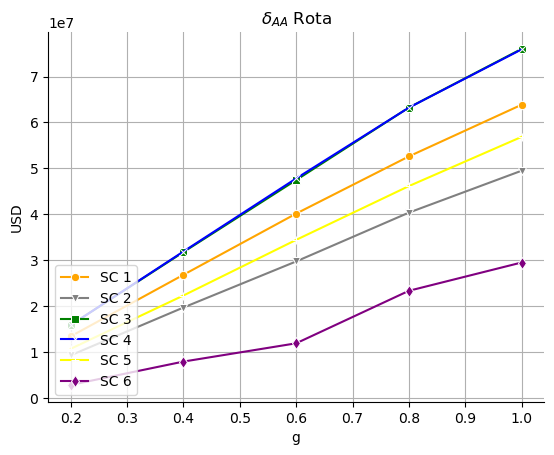

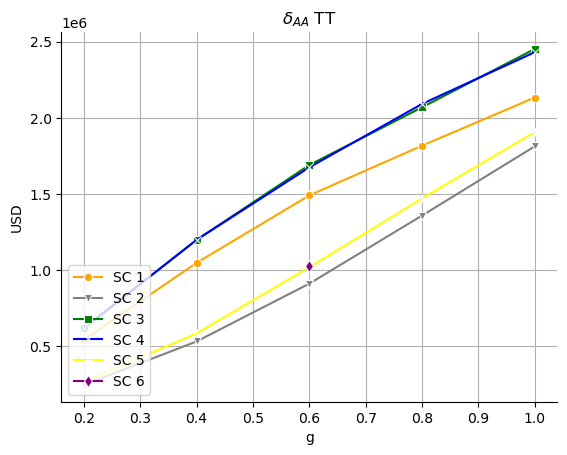

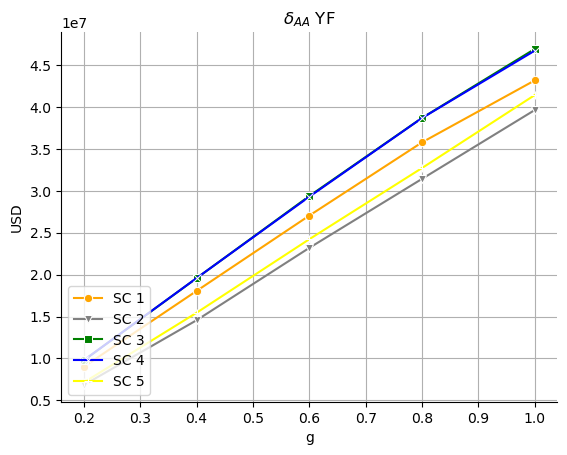

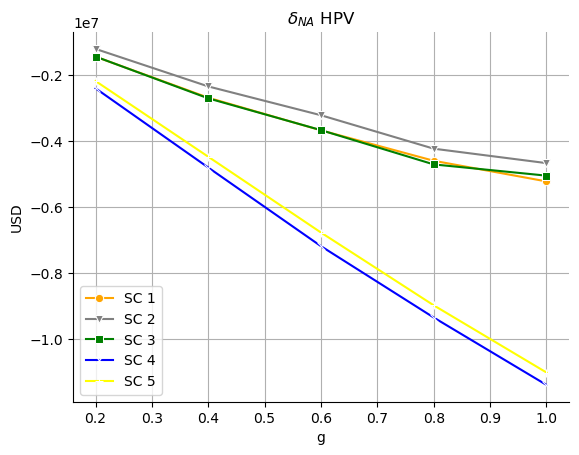

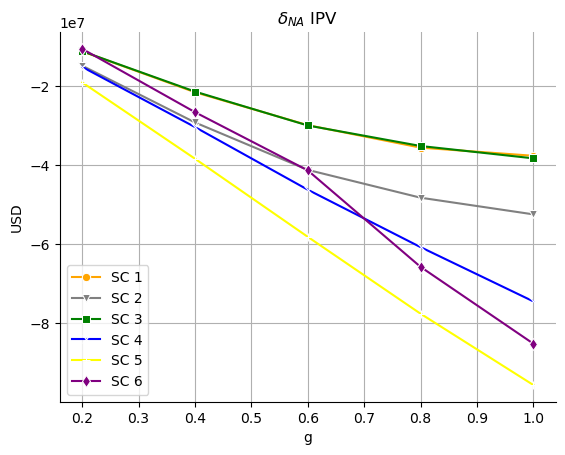

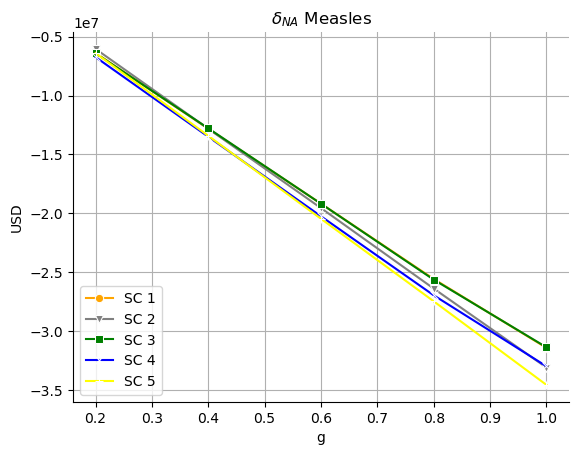

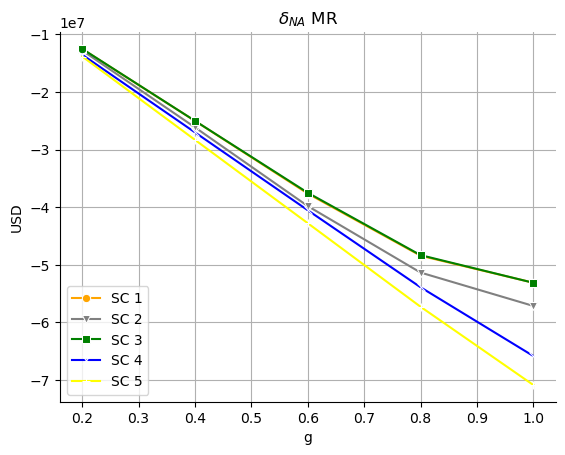

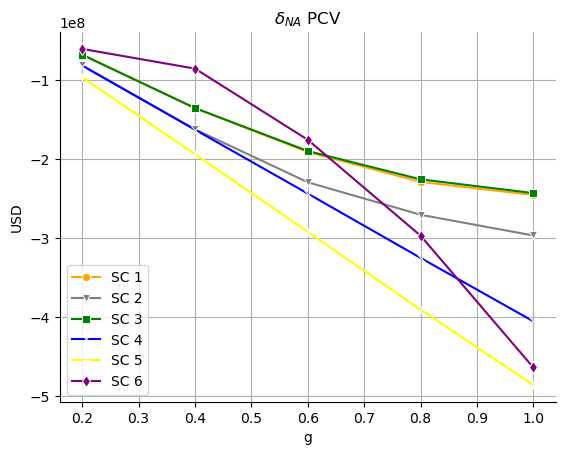

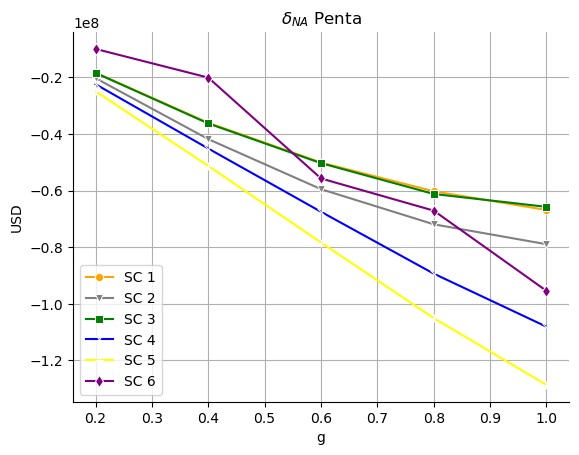

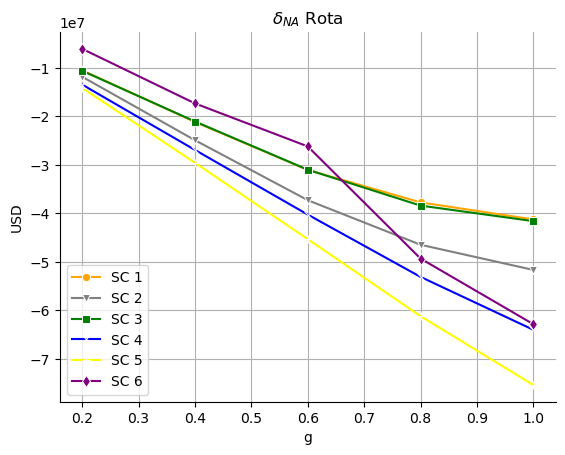

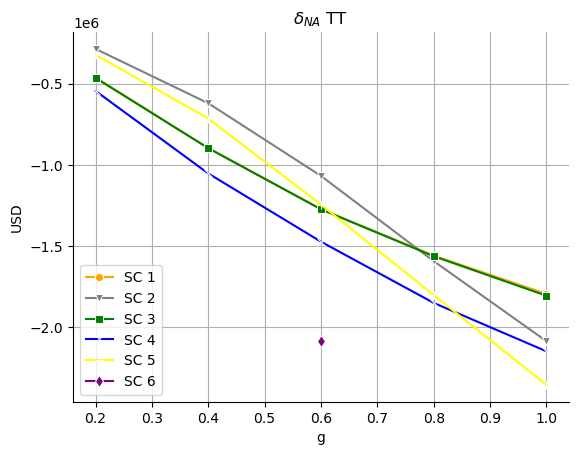

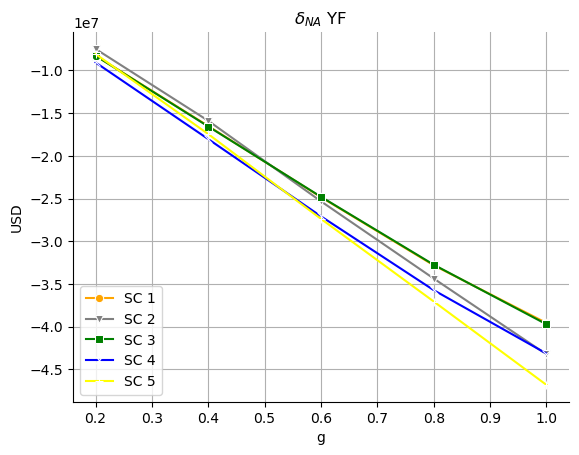

In [28]:
colorlist=['red','orange','gray','green','blue','yellow','purple']
mrklist=['p','o','v','s','x','+','d']

# plotting a figure for all pDdif_mean for all vaccines ($\delta_{NN}$)

for vc in vaclist:
    dfref=df2[(df2['vac']==vc)&(df2['g']>0.00)]
    for ii in dfref.scenario.unique():
        sns.lineplot(x='g',y='pDdif_mean', data=dfref[dfref['scenario']==ii],marker=mrklist[ii], color=colorlist[ii], label='SC '+str(ii))
        plt.title(r'$\delta_{NN}$ '+str(vc))
        plt.xlabel('g')
        plt.ylabel('USD')
 
    # Add a legend
    plt.legend(loc='lower left')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()

# plotting a figure for all pOdif_mean for all vaccines ($\delta_{AA}}$)

for vc in vaclist:
    dfref=df2[(df2['vac']==vc)&(df2['g']>0.00)]
    for ii in dfref.scenario.unique():
        sns.lineplot(x='g',y='pOdif_mean', data=dfref[dfref['scenario']==ii],marker=mrklist[ii], color=colorlist[ii], label='SC '+str(ii))
        plt.title(r'$\delta_{AA}$ '+str(vc))
        plt.xlabel('g')
        plt.ylabel('USD')
 
    # Add a legend
    plt.legend(loc='lower left')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()

    
# plotting a figure for all pTdif_mean for all vaccines ($\delta_{NA}$)

for vc in vaclist:
    dfref=df2[(df2['vac']==vc)&(df2['g']>0.00)]
    for ii in dfref.scenario.unique():
        sns.lineplot(x='g',y='pTdif_mean', data=dfref[dfref['scenario']==ii],marker=mrklist[ii], color=colorlist[ii], label='SC '+str(ii))
        plt.title(r'$\delta_{NA}$ '+str(vc))
        plt.xlabel('g')
        plt.ylabel('USD')
 
    # Add a legend
    plt.legend(loc='lower left')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()

## Figure 4 plots ( $\text{benefit}_i^j$)
Average net benefit from sales of vaccine $j$ across all
procurement interactions, for various supply goal levels, $g$

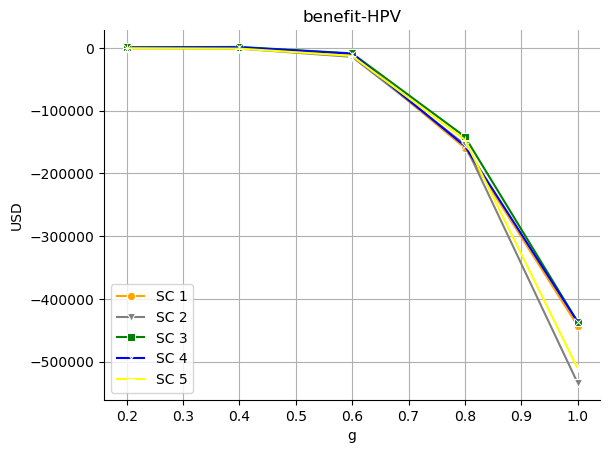

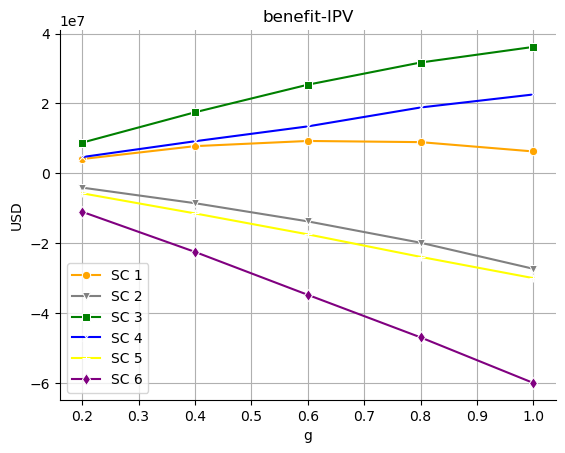

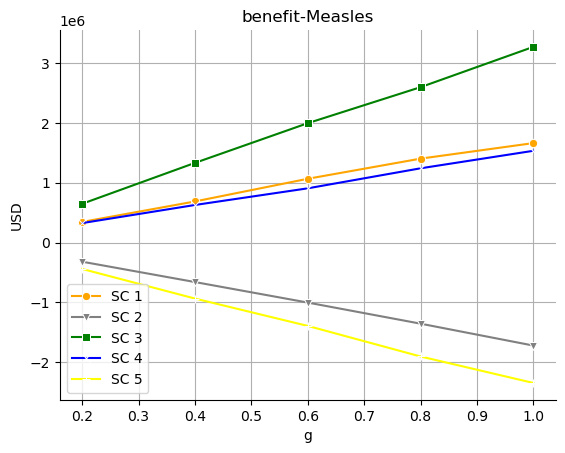

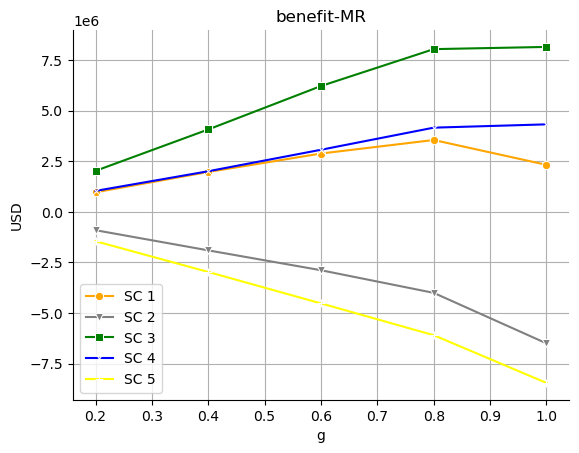

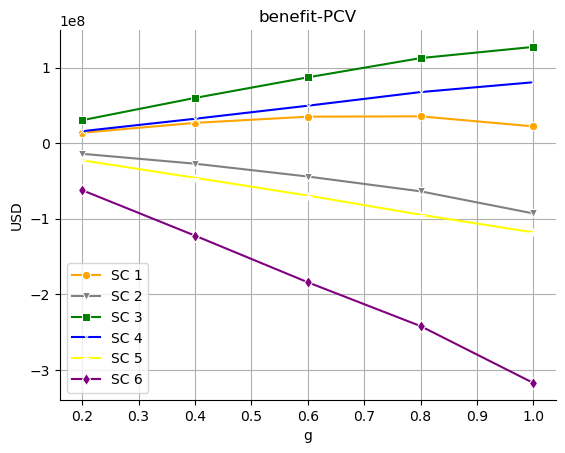

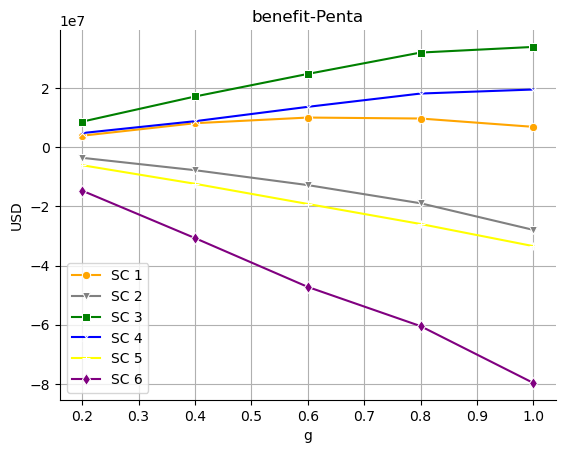

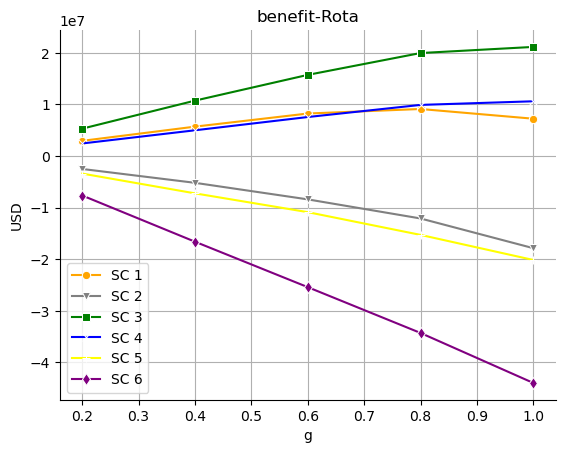

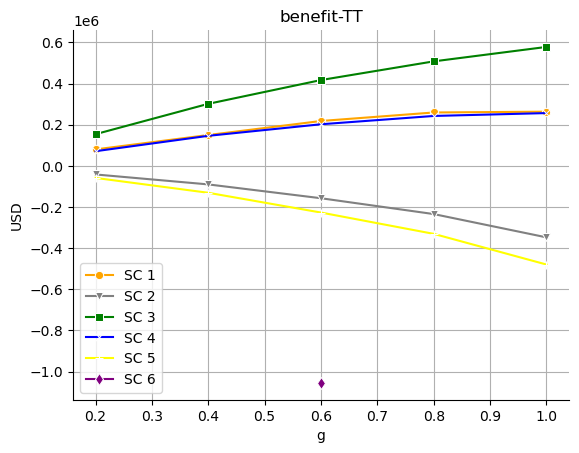

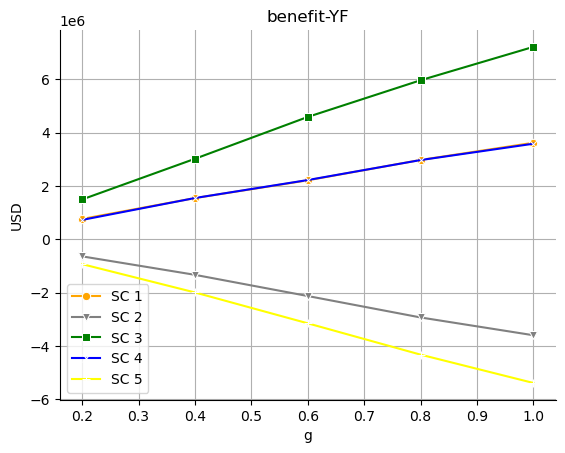

In [29]:
colorlist=['red','orange','gray','green','blue','yellow','purple']
mrklist=['p','o','v','s','x','+','d']
for vc in vaclist:
    dfref=df2[(df2['vac']==vc)&(df2['g']>0.00)]
    for ii in dfref.scenario.unique():
        sns.lineplot(x='g',y='benefit_mean', data=dfref[dfref['scenario']==ii],marker=mrklist[ii], color=colorlist[ii], label='SC '+str(ii))
        plt.title('benefit-'+str(vc))
        plt.xlabel('g')
        plt.ylabel('USD')
 
    # Add a legend
    plt.legend(loc='lower left')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()


## Figure 5 ($\frac{\text{benefit}}{MV}$)

Ratio between average benefit over market value at benchmark scenario (at $g = 0$) per
vaccine, scenario, and $g$

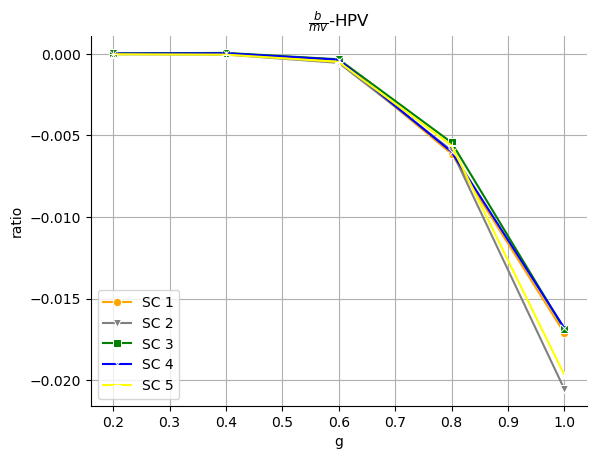

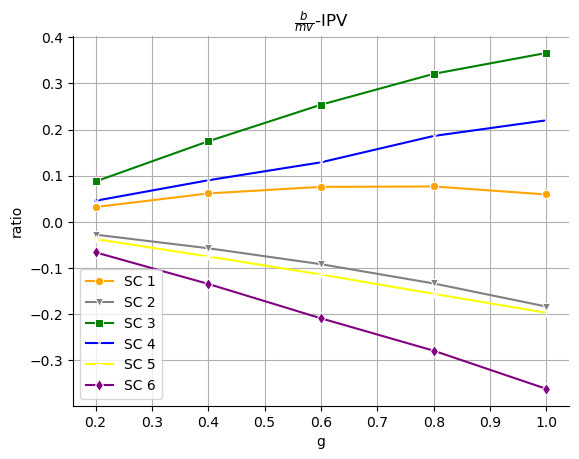

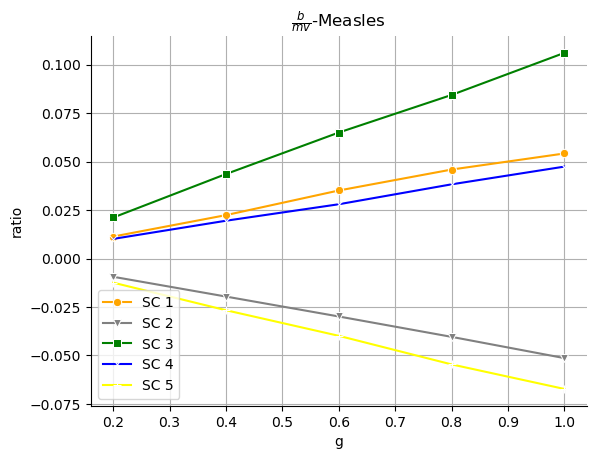

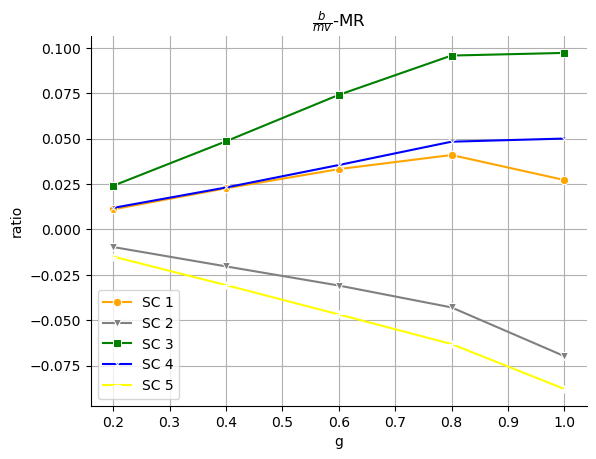

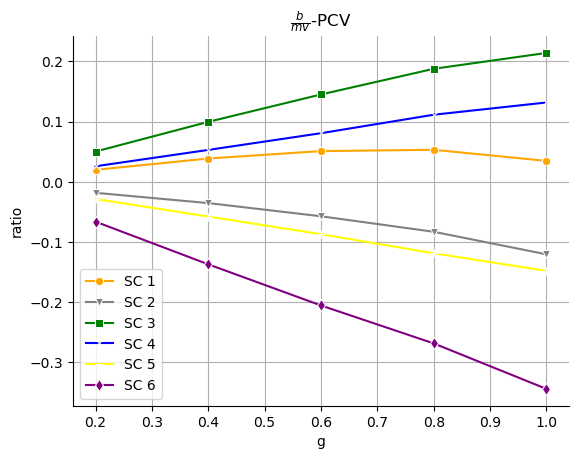

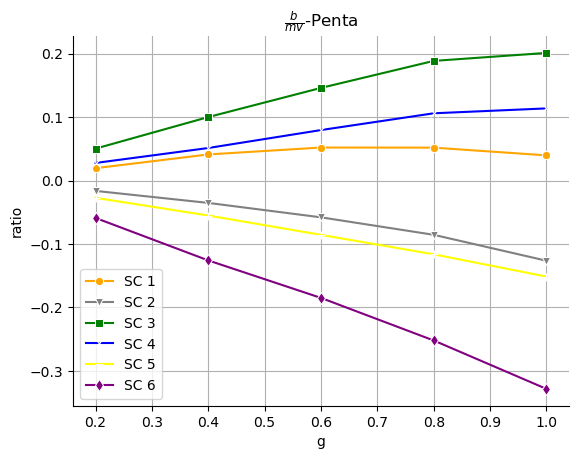

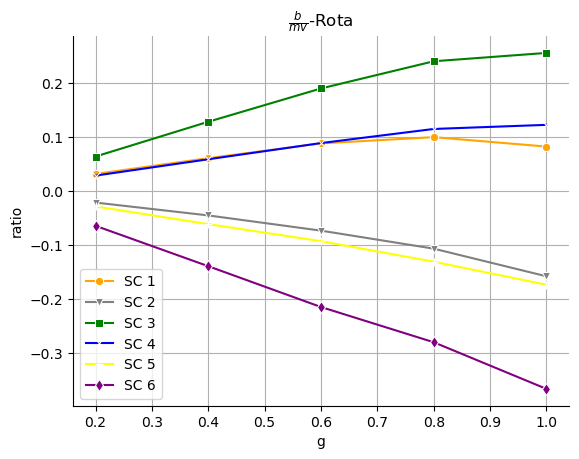

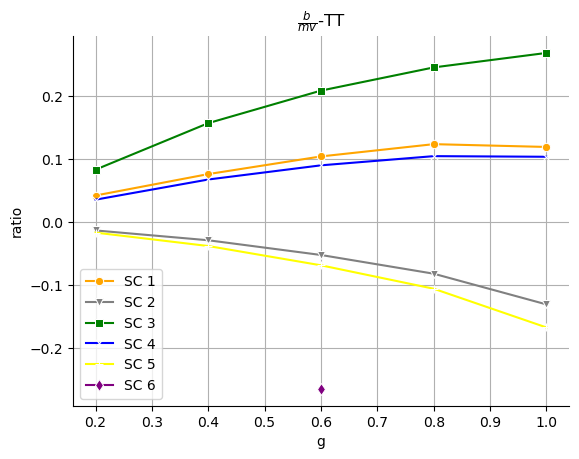

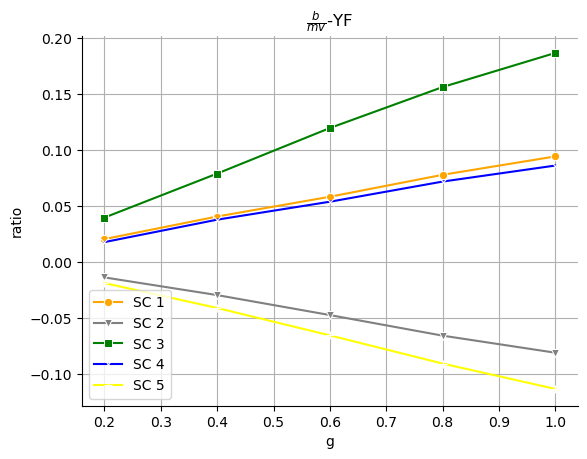

In [41]:
colorlist=['red','orange','gray','green','blue','yellow','purple']
mrklist=['p','o','v','s','x','+','d']
for vc in vaclist:
    dfref=df2[(df2['vac']==vc)&(df2['g']>0.00)]
    for ii in dfref.scenario.unique():
        sns.lineplot(x='g',y='ben_mv_mean', data=dfref[dfref['scenario']==ii],marker=mrklist[ii], color=colorlist[ii], label='SC '+str(ii))
        plt.title(r'$\frac{b}{mv}$-'+str(vc))
        plt.xlabel('g')
        plt.ylabel('ratio')
 
    # Add a legend
    plt.legend(loc='lower left')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()


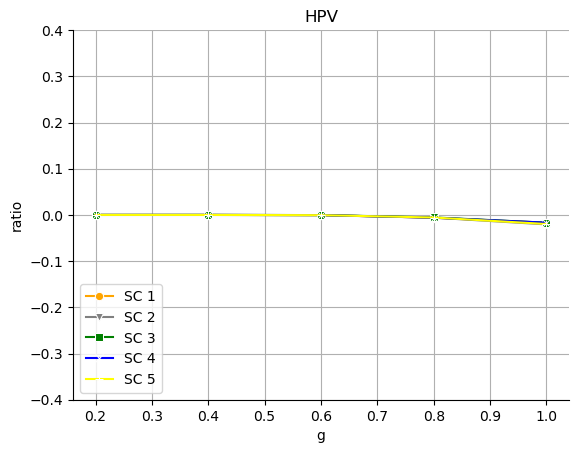

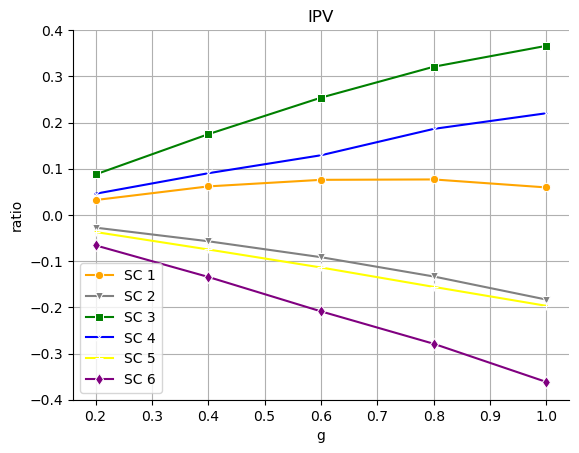

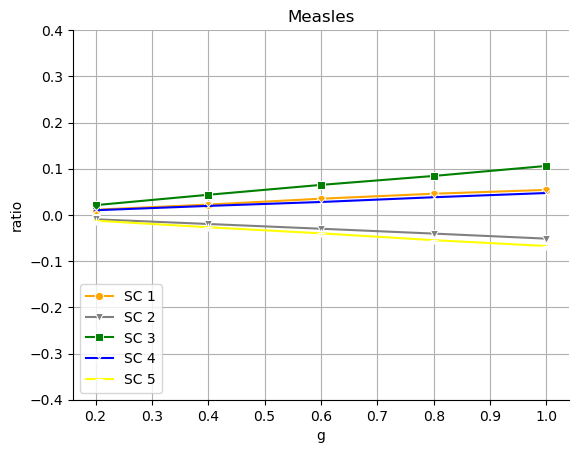

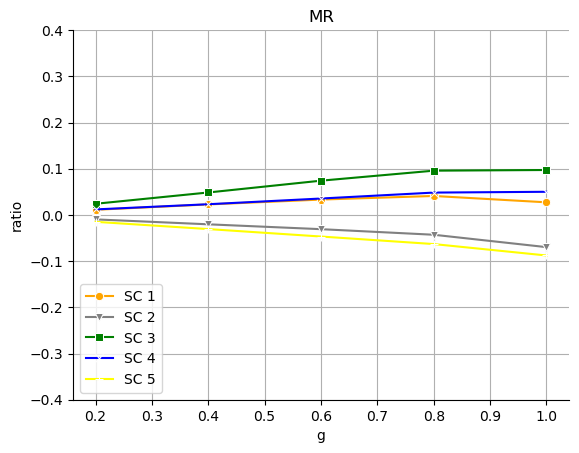

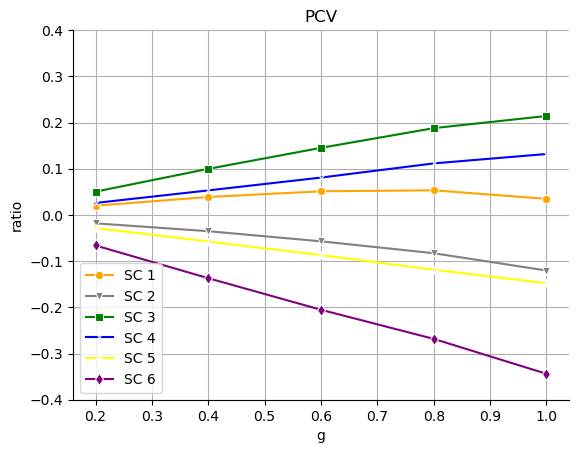

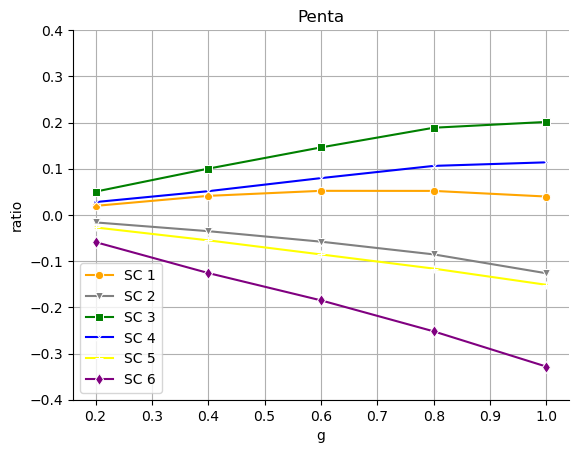

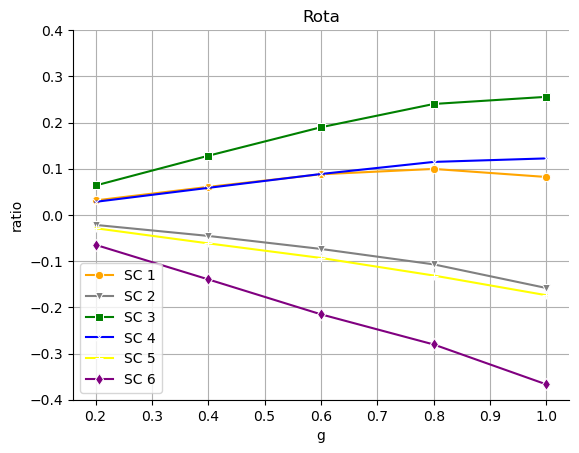

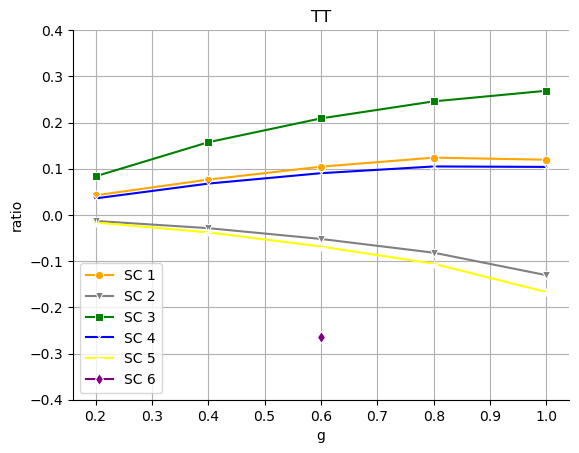

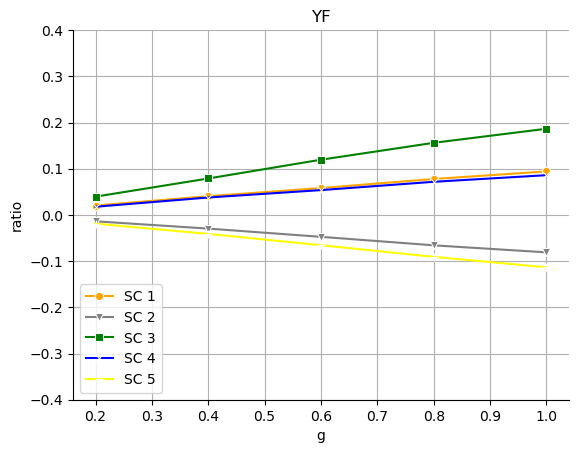

In [42]:
## fixign the y-axe levels for the benefit-mv plot

colorlist=['red','orange','gray','green','blue','yellow','purple']
mrklist=['p','o','v','s','x','+','d']
for vc in vaclist:
    dfref=df2[(df2['vac']==vc)&(df2['g']>0.00)]
    for ii in dfref.scenario.unique():
        sns.lineplot(x='g',y='ben_mv_mean', data=dfref[dfref['scenario']==ii],marker=mrklist[ii], color=colorlist[ii], label='SC '+str(ii))
        plt.title(str(vc))
        plt.xlabel('g')
        plt.ylabel('ratio')
        plt.ylim(-0.4, 0.4)
 
    # Add a legend
    plt.legend(loc='lower left')
 
    # Add a grid
    plt.grid(True)
 
    # Remove the top and right spines
    sns.despine()
 
    # Show the plot
    plt.show()

In [32]:
for i in dfref.scenario.unique():
    print(i)

1
2
3
4
5


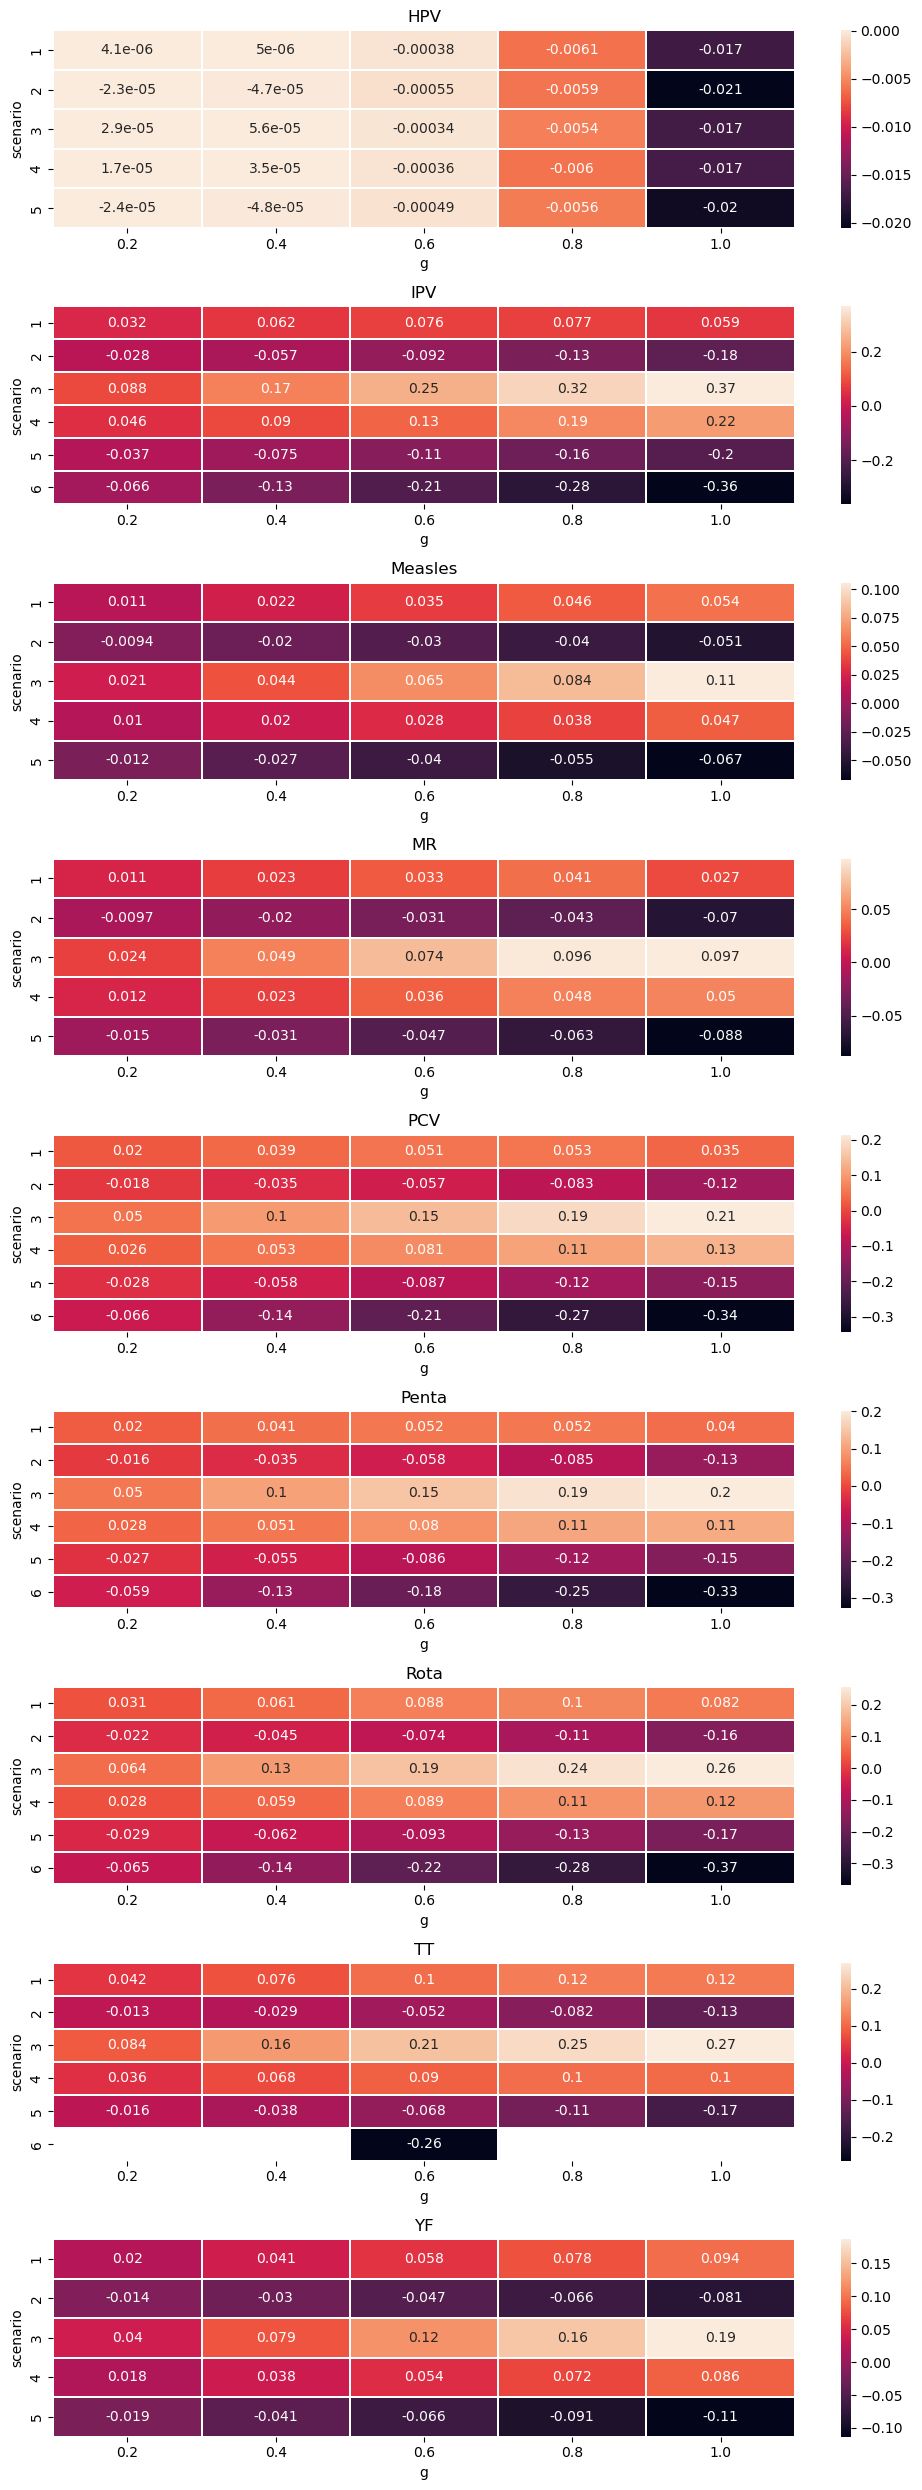

In [33]:
fig, axes = plt.subplots(9, 1, figsize=(10, 25))
 
i=0
for vc in vaclist:      
    dfint=df2[(df2['vac']==vc)&(df2['g']>0.00)].pivot(index="scenario", columns="g", values="ben_mv_mean")
    sns.heatmap(ax=axes[i], data=dfint,annot=True, linewidth=.1)#, vmin=-3.6e8, vmax=1.2e8)
    axes[i].set_title(vc)
    i=i+1
plt.tight_layout()

plt.show()


In [34]:
df2[df2['vac']=='YF'].pivot(index='scenario', columns='g', values='ben_mv_mean').min(axis='columns')

scenario
1    0.000
2   -0.081
3    0.000
4    0.000
5   -0.113
dtype: float64

### Table 6. Sum of minimum and maximum absolute values across vaccines and corresponding proportion of MV

In [35]:
pd.set_option('display.precision', 2)

In [36]:
dfabsben_hpv=abs(df2[df2['vac']=='HPV'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]
dfabsben_ipv=abs(df2[df2['vac']=='IPV'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]
dfabsben_measles=abs(df2[df2['vac']=='Measles'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]
dfabsben_mr=abs(df2[df2['vac']=='MR'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]
dfabsben_pcv=abs(df2[df2['vac']=='PCV'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]
dfabsben_penta=abs(df2[df2['vac']=='Penta'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]
dfabsben_rota=abs(df2[df2['vac']=='Rota'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]
dfabsben_tt=abs(df2[df2['vac']=='TT'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]
dfabsben_yf=abs(df2[df2['vac']=='YF'].pivot(index='scenario', columns='g', values='benefit_mean')).describe().loc[["min","max"]]

In [37]:
sum([dfabsben_hpv,dfabsben_ipv,dfabsben_measles,dfabsben_mr,dfabsben_pcv,dfabsben_penta,dfabsben_rota,dfabsben_tt,dfabsben_yf])

g    0.0       0.2       0.4       0.6       0.8       1.0
min  0.0  2.59e+07  5.14e+07  6.80e+07  7.13e+07  5.08e+07
max  0.0  1.00e+08  2.01e+08  3.05e+08  4.01e+08  5.21e+08

In [38]:
print(dfabsben_hpv)
print(dfabsben_ipv)
print(dfabsben_measles)
print(dfabsben_mr)
print(dfabsben_pcv)
print(dfabsben_penta)
print(dfabsben_rota)
print(dfabsben_tt)
print(dfabsben_yf)

g    0.0     0.2      0.4       0.6        0.8        1.0
min  0.0   95.32   110.96   8841.75  141480.35  436387.15
max  0.0  729.79  1436.50  14408.05  159609.63  533737.77
g    0.0       0.2       0.4       0.6       0.8       1.0
min  0.0  4.09e+06  7.77e+06  9.26e+06  8.92e+06  6.26e+06
max  0.0  1.10e+07  2.25e+07  3.48e+07  4.70e+07  6.00e+07
g    0.0        0.2       0.4       0.6       0.8       1.0
min  0.0  319228.67  6.29e+05  9.07e+05  1.24e+06  1.53e+06
max  0.0  650027.99  1.33e+06  2.00e+06  2.60e+06  3.27e+06
g    0.0       0.2       0.4       0.6       0.8       1.0
min  0.0  9.09e+05  1.91e+06  2.88e+06  3.55e+06  2.32e+06
max  0.0  2.02e+06  4.07e+06  6.22e+06  8.04e+06  8.46e+06
g    0.0       0.2       0.4       0.6       0.8       1.0
min  0.0  1.38e+07  2.69e+07  3.51e+07  3.55e+07  2.23e+07
max  0.0  6.22e+07  1.22e+08  1.84e+08  2.42e+08  3.17e+08
g    0.0       0.2       0.4       0.6       0.8       1.0
min  0.0  3.62e+06  7.79e+06  9.99e+06  9.66e+06  6.85e+